<a href="https://colab.research.google.com/github/Abishek-Subramaniam/Ad-ease-Time-series/blob/main/adease_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install gdown

import gdown

# Download the CSV files using gdown
campaign_url = 'https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE'
train_url = 'https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl'

campaign_path = 'Exog_Campaign_eng.csv'
train_path = 'train_1.csv'

gdown.download(campaign_url, campaign_path, quiet=False)
gdown.download(train_url, train_path, quiet=False)


campaign_df = pd.read_csv(campaign_path)
train_df = pd.read_csv(train_path)

Downloading...
From: https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE
To: /content/Exog_Campaign_eng.csv
100%|██████████| 1.10k/1.10k [00:00<00:00, 2.98MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl
From (redirected): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl&confirm=t&uuid=838d3bfe-fa18-4318-9d24-9110910abce2
To: /content/train_1.csv
100%|██████████| 278M/278M [00:01<00:00, 154MB/s] 


In [ ]:
campaign_df.head()

Exog
0     0
1     0
2     0
3     0
4     0

In [ ]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [ ]:
campaign_df.describe()

Exog
count  550.000000
mean     0.098182
std      0.297831
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000

In [ ]:
campaign_df.isnull().sum()

Exog    0
dtype: int64

In [ ]:
campaign_df['Exog'].value_counts()

Exog
0    496
1     54
Name: count, dtype: int64

In [ ]:
train_df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [ ]:
train_df.isnull().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [ ]:
# assuming that null values represents that there is no view on that page on that date
#fill the null values with 0 views
train_df.fillna(0, inplace=True)

In [ ]:
train_df.isnull().sum().sum()

0

In [ ]:
# Split the 'Page' column into 4 parts: Specific Name + Language + Access Type + Access Origin

train_df[['specific_name', 'language_access_type', 'access_type', 'access_origin']] = train_df['Page'].str.rsplit('_', n=3, expand=True)

# Now, split 'language_access_type' into 'language' and 'source' by using '.'
train_df[['language', 'source']] = train_df['language_access_type'].str.split('.', n=1, expand=True)

# Dropping the intermediate column
train_df.drop(columns=['language_access_type'], inplace=True)

train_df[['Page', 'specific_name', 'language', 'source', 'access_type', 'access_origin']].head()



Page     specific_name  \
0            2NE1_zh.wikipedia.org_all-access_spider              2NE1   
1             2PM_zh.wikipedia.org_all-access_spider               2PM   
2              3C_zh.wikipedia.org_all-access_spider                3C   
3         4minute_zh.wikipedia.org_all-access_spider           4minute   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...  52_Hz_I_Love_You   

  language         source access_type access_origin  
0       zh  wikipedia.org  all-access        spider  
1       zh  wikipedia.org  all-access        spider  
2       zh  wikipedia.org  all-access        spider  
3       zh  wikipedia.org  all-access        spider  
4       zh  wikipedia.org  all-access        spider

###EDA

In [ ]:
train_df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         0.0         0.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-09  ...  2016-12-27  2016-12-28  2016-12-29  2016-12-30  \
0        26.0  ...        20.0        22.0        19.0        18.0   
1        10.0  ...        30.0        52.0        45.0        26.0   
2         4.0  ...         4.0         6.0         3.0         4.0   
3        11.0  ...        11.0        17.0        19.0        10.0   
4         0.0  ...        11.0        27.0        13.0        36.0   

   2016-12-31     specific_name  access_type  access_origin  language  \
0        20.0              2NE1   all-access         spider        zh   
1        20.0               2PM   all-access         spider        zh   
2        17.0                3C   all-access         spider        zh   
3        11.0           4minute   all-access         spider        zh   
4        10.0  52_Hz_I_Love_You   all-access         spider        zh   

          source  
0  wikipedia.org  
1  wikipedia.org  
2  wikipedia.org  
3  wikipedia.org  
4  wikipedia.org  

[5 rows x 556 columns]

In [ ]:
date_columns = train_df.columns[1:-5]
date_columns

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [ ]:
# Summing the views across the date columns for each specific_name
train_df['total_views'] = train_df[date_columns].sum(axis=1)
train_df['avg_views_specific_name'] = train_df[date_columns].mean(axis=1)

In [ ]:
train_df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         0.0         0.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-09  ...  2016-12-29  2016-12-30  2016-12-31     specific_name  \
0        26.0  ...        19.0        18.0        20.0              2NE1   
1        10.0  ...        45.0        26.0        20.0               2PM   
2         4.0  ...         3.0         4.0        17.0                3C   
3        11.0  ...        19.0        10.0        11.0           4minute   
4         0.0  ...        13.0        36.0        10.0  52_Hz_I_Love_You   

   access_type  access_origin  language         source  total_views  \
0   all-access         spider        zh  wikipedia.org      11966.0   
1   all-access         spider        zh  wikipedia.org      13966.0   
2   all-access         spider        zh  wikipedia.org       2862.0   
3   all-access         spider        zh  wikipedia.org       9419.0   
4   all-access         spider        zh  wikipedia.org       2662.0   

   avg_views_specific_name  
0                21.756364  
1                25.392727  
2                 5.203636  
3                17.125455  
4                 4.840000  

[5 rows x 558 columns]

In [ ]:
train_df['total_views'].describe()

count    1.450630e+05
mean     7.203713e+05
std      4.100254e+07
min      0.000000e+00
25%      1.462900e+04
50%      1.318250e+05
75%      4.505545e+05
max      1.206618e+10
Name: total_views, dtype: float64

In [ ]:
train_df['avg_views_specific_name'].describe()

count    1.450630e+05
mean     1.309766e+03
std      7.455007e+04
min      0.000000e+00
25%      2.659818e+01
50%      2.396818e+02
75%      8.191900e+02
max      2.193851e+07
Name: avg_views_specific_name, dtype: float64

In [ ]:
train_df['access_type'].value_counts()


access_type
all-access    74315
mobile-web    35939
desktop       34809
Name: count, dtype: int64

In [ ]:
total_views_per_access_type = train_df.groupby('access_type')['total_views'].sum()
total_views_per_access_type

access_type
all-access    5.283239e+10
desktop       2.848717e+10
mobile-web    2.317965e+10
Name: total_views, dtype: float64

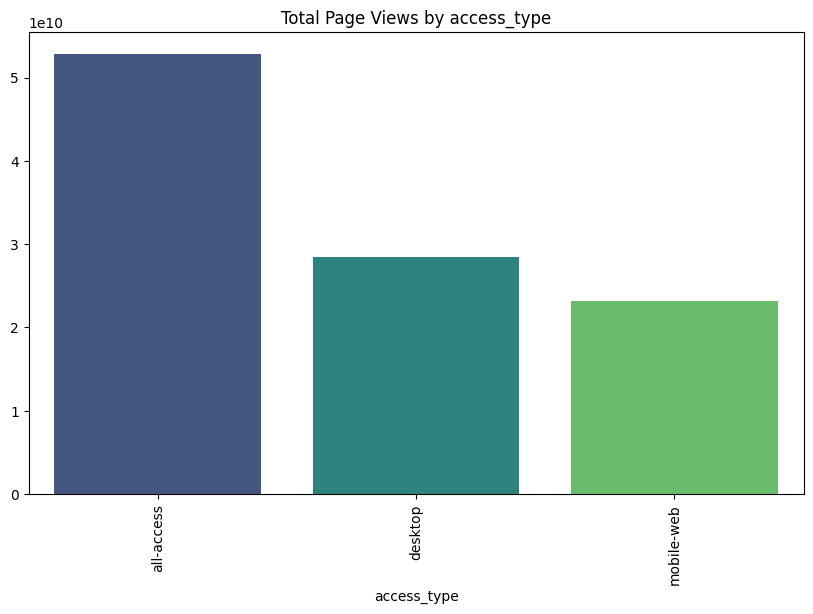

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=total_views_per_access_type.index, y=total_views_per_access_type.values, palette='viridis')
plt.xlabel('access_type')
plt.title('Total Page Views by access_type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_df['access_origin'].value_counts()


access_origin
all-agents    110150
spider         34913
Name: count, dtype: int64

In [ ]:
total_views_per_access_origin = train_df.groupby('access_origin')['total_views'].sum()
total_views_per_access_origin

access_origin
all-agents    1.032227e+11
spider        1.276482e+09
Name: total_views, dtype: float64

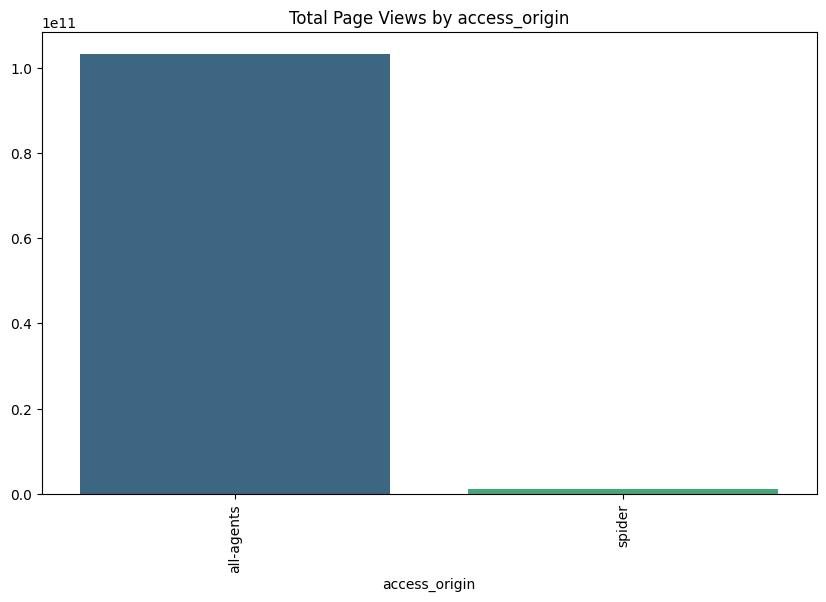

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=total_views_per_access_origin.index, y=total_views_per_access_origin.values, palette='viridis')
plt.xlabel('access_origin')
plt.title('Total Page Views by access_origin')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_df['language'].value_counts()

language
en         24108
ja         20431
de         18547
fr         17802
zh         17229
ru         15022
es         14069
commons    10555
www         7300
Name: count, dtype: int64

In [ ]:
total_views_per_language = train_df.groupby('language')['total_views'].sum()
total_views_per_language

language
commons    1.049475e+09
de         8.862014e+09
en         5.874876e+10
es         9.490200e+09
fr         6.377824e+09
ja         8.571290e+09
ru         7.998366e+09
www        2.293049e+08
zh         3.171985e+09
Name: total_views, dtype: float64

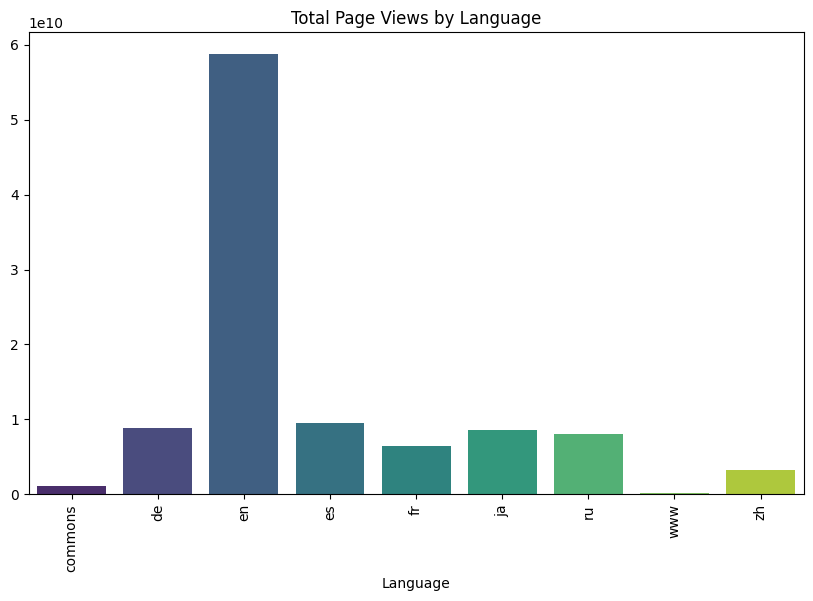

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=total_views_per_language.index, y=total_views_per_language.values, palette='viridis')
plt.xlabel('Language')
plt.title('Total Page Views by Language')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#groupby specific name
total_views_per_specific_name = train_df.groupby('specific_name')['total_views'].sum()
total_views_per_specific_name

specific_name
!vote                                               4521.0
"Awaken,_My_Love!"                                683023.0
"European_Society_for_Clinical_Investigation"        716.0
"Heroes"_(David_Bowie_album)                     1099896.0
"Keep_me_logged_in"_extended_to_one_year            6638.0
                                                   ...    
龔嘉欣                                               556898.0
龔照勝                                                21963.0
龙生九子                                               76452.0
대문                                                209850.0
［Alexandros］                                     4321091.0
Name: total_views, Length: 49174, dtype: float64

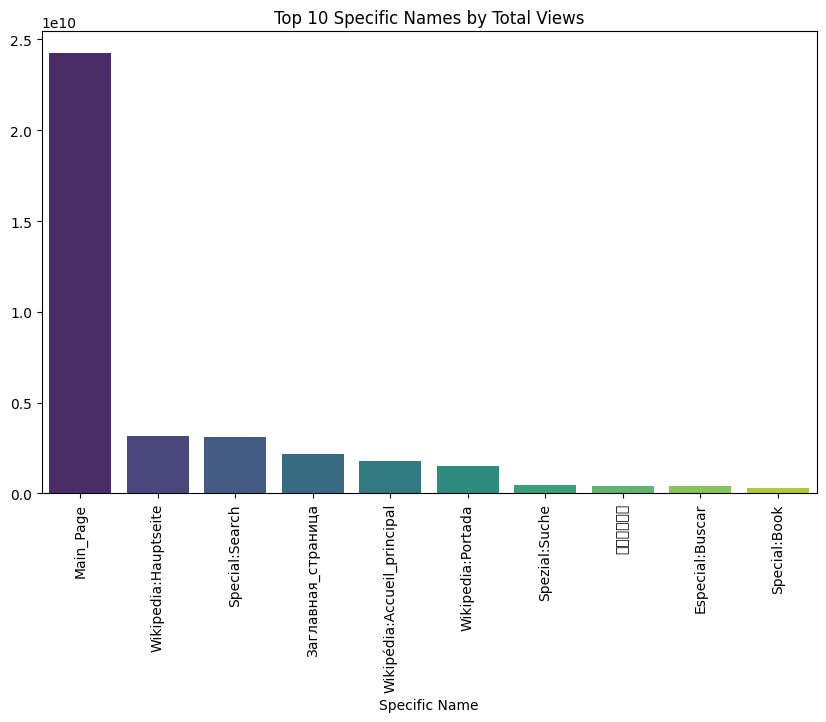

In [ ]:
#plotting top names with high views
plt.figure(figsize=(10,6))
sns.barplot(x=total_views_per_specific_name.nlargest(10).index, y=total_views_per_specific_name.nlargest(10).values, palette='viridis')
plt.xlabel('Specific Name')
plt.title('Top 10 Specific Names by Total Views')
plt.xticks(rotation=90)
plt.show()



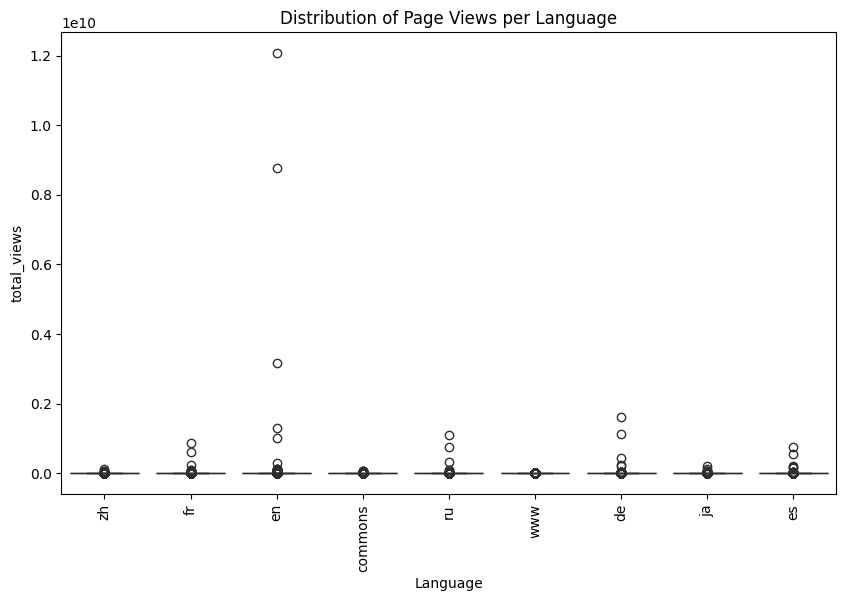

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='language', y='total_views', data=train_df, palette='viridis')
plt.xlabel('Language')
plt.title('Distribution of Page Views per Language')
plt.xticks(rotation=90)
plt.show()

### PREPARING THE DATA FOR THE MODELS

In [ ]:
train_df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         0.0         0.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-09  ...  2016-12-29  2016-12-30  2016-12-31     specific_name  \
0        26.0  ...        19.0        18.0        20.0              2NE1   
1        10.0  ...        45.0        26.0        20.0               2PM   
2         4.0  ...         3.0         4.0        17.0                3C   
3        11.0  ...        19.0        10.0        11.0           4minute   
4         0.0  ...        13.0        36.0        10.0  52_Hz_I_Love_You   

   access_type  access_origin  language         source  total_views  \
0   all-access         spider        zh  wikipedia.org      11966.0   
1   all-access         spider        zh  wikipedia.org      13966.0   
2   all-access         spider        zh  wikipedia.org       2862.0   
3   all-access         spider        zh  wikipedia.org       9419.0   
4   all-access         spider        zh  wikipedia.org       2662.0   

   avg_views_specific_name  
0                21.756364  
1                25.392727  
2                 5.203636  
3                17.125455  
4                 4.840000  

[5 rows x 558 columns]

In [ ]:
df=train_df.copy()
df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         0.0         0.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-09  ...  2016-12-29  2016-12-30  2016-12-31     specific_name  \
0        26.0  ...        19.0        18.0        20.0              2NE1   
1        10.0  ...        45.0        26.0        20.0               2PM   
2         4.0  ...         3.0         4.0        17.0                3C   
3        11.0  ...        19.0        10.0        11.0           4minute   
4         0.0  ...        13.0        36.0        10.0  52_Hz_I_Love_You   

   access_type  access_origin  language         source  total_views  \
0   all-access         spider        zh  wikipedia.org      11966.0   
1   all-access         spider        zh  wikipedia.org      13966.0   
2   all-access         spider        zh  wikipedia.org       2862.0   
3   all-access         spider        zh  wikipedia.org       9419.0   
4   all-access         spider        zh  wikipedia.org       2662.0   

   avg_views_specific_name  
0                21.756364  
1                25.392727  
2                 5.203636  
3                17.125455  
4                 4.840000  

[5 rows x 558 columns]

In [ ]:
df.drop(['Page','total_views','avg_views_specific_name','source'], axis=1, inplace=True)

In [ ]:
df.head()

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-26  \
0         9.0        22.0        26.0        24.0  ...        14.0   
1        22.0        11.0        10.0         4.0  ...         9.0   
2         0.0         3.0         4.0         4.0  ...         4.0   
3        14.0         9.0        11.0        16.0  ...        16.0   
4         0.0         0.0         0.0         0.0  ...         3.0   

   2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
0        20.0        22.0        19.0        18.0        20.0   
1        30.0        52.0        45.0        26.0        20.0   
2         4.0         6.0         3.0         4.0        17.0   
3        11.0        17.0        19.0        10.0        11.0   
4        11.0        27.0        13.0        36.0        10.0   

      specific_name  access_type  access_origin  language  
0              2NE1   all-access         spider        zh  
1               2PM   all-access         spider        zh  
2                3C   all-access         spider        zh  
3           4minute   all-access         spider        zh  
4  52_Hz_I_Love_You   all-access         spider        zh  

[5 rows x 554 columns]

In [ ]:
df['specific_name'].nunique()

49174

In [ ]:
df.shape

(145063, 554)

In [ ]:
# Set the index to the identifier columns, then stack the date columns
df_stacked = df.set_index(['specific_name', 'language', 'access_type', 'access_origin']).stack().reset_index()

# Rename the columns appropriately
df_stacked.columns = ['specific_name', 'language', 'access_type', 'access_origin', 'Date', 'Views']

# Convert the 'Date' column to a proper datetime format
df_stacked['Date'] = pd.to_datetime(df_stacked['Date'])

df_stacked.head(5)


specific_name language access_type access_origin       Date  Views
0          2NE1       zh  all-access        spider 2015-07-01   18.0
1          2NE1       zh  all-access        spider 2015-07-02   11.0
2          2NE1       zh  all-access        spider 2015-07-03    5.0
3          2NE1       zh  all-access        spider 2015-07-04   13.0
4          2NE1       zh  all-access        spider 2015-07-05   14.0

In [ ]:
df_stacked.shape

(79784650, 6)

In [ ]:
# Grouping by language and Date, aggregating views
aggregated_data = df_stacked.groupby(['language', 'Date'])['Views'].sum().reset_index()

# Check the aggregated data
aggregated_data.head()


language       Date      Views
0  commons 2015-07-01  1140821.0
1  commons 2015-07-02  1178130.0
2  commons 2015-07-03  1150547.0
3  commons 2015-07-04   951317.0
4  commons 2015-07-05  1058036.0

In [ ]:
aggregated_data.shape

(4950, 3)

In [ ]:
print(aggregated_data['Date'].min())
print(aggregated_data['Date'].max())

2015-07-01 00:00:00
2016-12-31 00:00:00


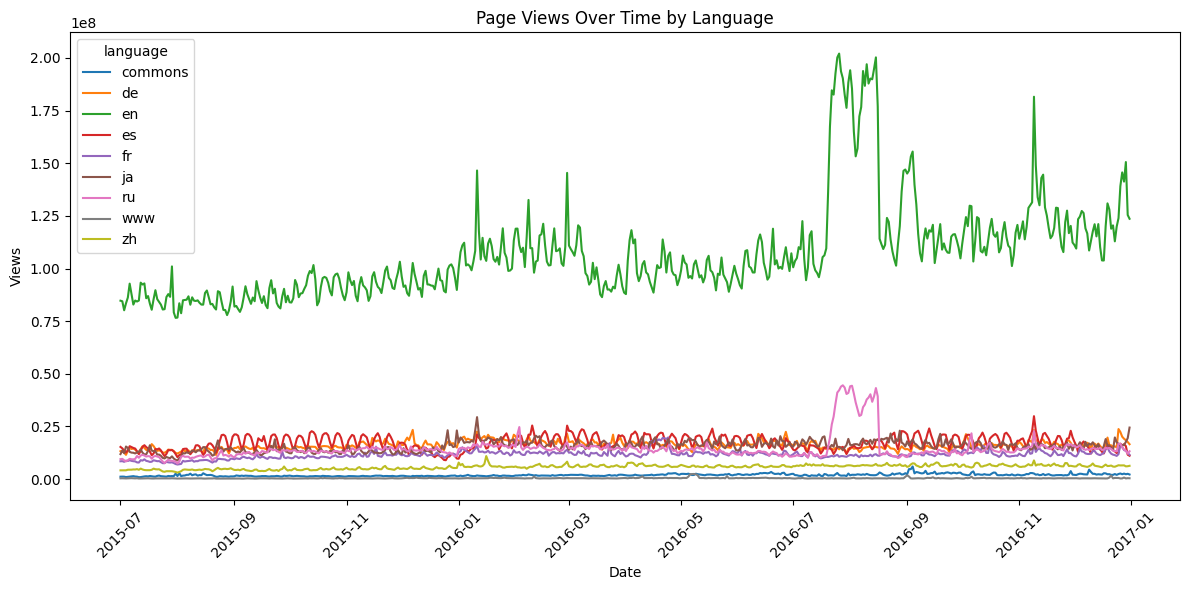

In [ ]:
# Plot for all languages using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=aggregated_data, x='Date', y='Views', hue='language')

plt.title('Page Views Over Time by Language')
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


###MODEL FORN AN ENGLISH LANGUAGE

In [ ]:
# Lets make an model for language english
aggregated_data_en = aggregated_data[aggregated_data['language'] == 'en'][['Date', 'Views']]
aggregated_data_en.head()

Date       Views
1100 2015-07-01  84712190.0
1101 2015-07-02  84438545.0
1102 2015-07-03  80167728.0
1103 2015-07-04  83463204.0
1104 2015-07-05  86198637.0

In [ ]:
# set index as date
aggregated_data_en.set_index('Date', inplace=True)

aggregated_data_en.head()

Views
Date                  
2015-07-01  84712190.0
2015-07-02  84438545.0
2015-07-03  80167728.0
2015-07-04  83463204.0
2015-07-05  86198637.0

In [ ]:
aggregated_data_en.shape

(550, 1)

<Axes: xlabel='Date'>

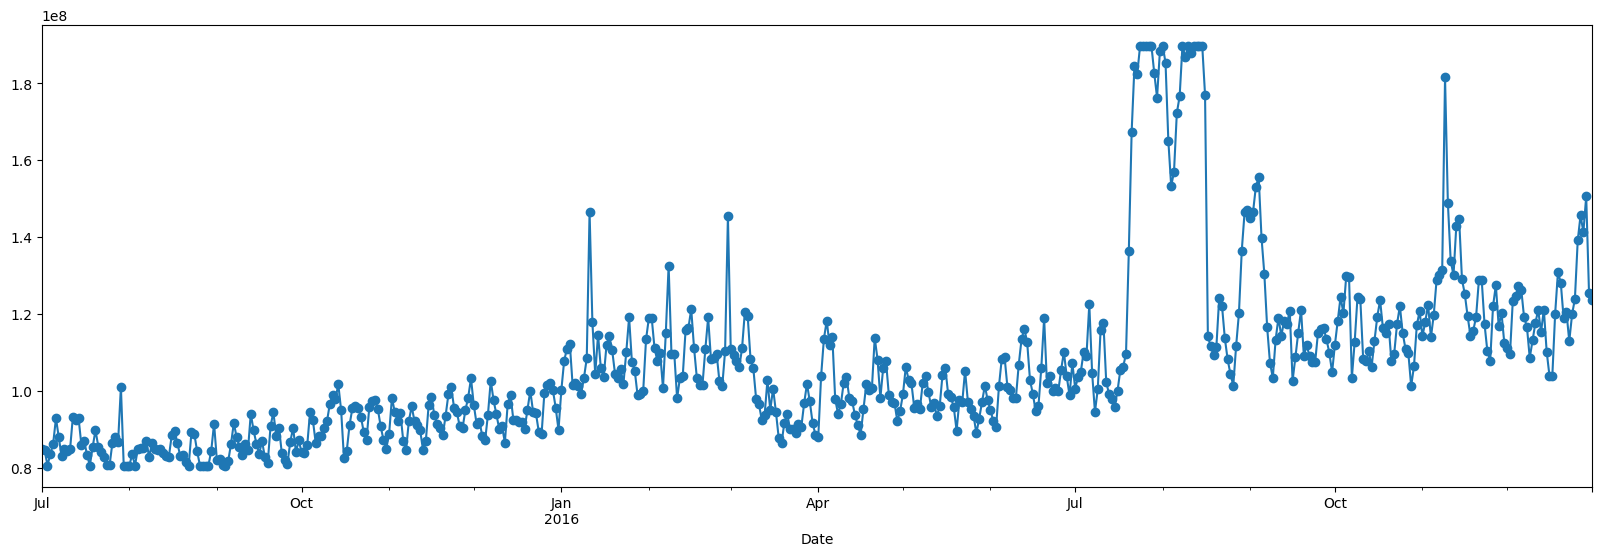

In [ ]:
# linear interpolation
aggregated_data_en.Views = aggregated_data_en.Views.interpolate(method='linear')

# anomalies - clip quantiles
aggregated_data_en.Views = aggregated_data_en.Views.clip(upper=aggregated_data_en.Views.quantile(0.98), lower=aggregated_data_en.Views.quantile(0.02))

# plot
aggregated_data_en.Views.plot(style='-o', figsize=(20,6))

In [ ]:
train_max_date = aggregated_data_en.index[-50]
train_x = aggregated_data_en.loc[aggregated_data_en.index < aggregated_data_en.index[-50]].copy()
test_x = aggregated_data_en.loc[aggregated_data_en.index >= aggregated_data_en.index[-50]].copy()

test_x

Views
Date                   
2016-11-12  130035763.0
2016-11-13  142972124.0
2016-11-14  144571760.0
2016-11-15  128992025.0
2016-11-16  125139134.0
2016-11-17  119370015.0
2016-11-18  114363359.0
2016-11-19  115627979.0
2016-11-20  119242613.0
2016-11-21  128889139.0
2016-11-22  128704963.0
2016-11-23  117231427.0
2016-11-24  110258263.0
2016-11-25  107788108.0
2016-11-26  121988089.0
2016-11-27  127490837.0
2016-11-28  116790477.0
2016-11-29  120242864.0
2016-11-30  112338480.0
2016-12-01  111159461.0
2016-12-02  109467638.0
2016-12-03  123415683.0
2016-12-04  124686441.0
2016-12-05  127318828.0
2016-12-06  126321634.0
2016-12-07  119067425.0
2016-12-08  116664698.0
2016-12-09  108556739.0
2016-12-10  113151538.0
2016-12-11  117612405.0
2016-12-12  121038274.0
2016-12-13  115256926.0
2016-12-14  121088799.0
2016-12-15  110158419.0
2016-12-16  103840201.0
2016-12-17  103803798.0
2016-12-18  120028790.0
2016-12-19  130939883.0
2016-12-20  128043832.0
2016-12-21  118888048.0
2016-12-22  120491573.0
2016-12-23  112905341.0
2016-12-24  119860920.0
2016-12-25  123926291.0
2016-12-26  139112120.0
2016-12-27  145628731.0
2016-12-28  141278366.0
2016-12-29  150557534.0
2016-12-30  125404585.0
2016-12-31  123623809.0

In [ ]:
print(train_x.shape)
print(test_x.shape)

(500, 1)
(50, 1)


In [ ]:
print(train_x.isnull().sum())
print(test_x.isnull().sum())

Views    0
dtype: int64
Views    0
dtype: int64


In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

##Smoothing Based Methods

##Moving average forecasting

In [ ]:
df = aggregated_data_en.copy()

In [ ]:
pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=12,freq='MS'))

Empty DataFrame
Columns: []
Index: [2017-01-01 00:00:00, 2017-02-01 00:00:00, 2017-03-01 00:00:00, 2017-04-01 00:00:00, 2017-05-01 00:00:00, 2017-06-01 00:00:00, 2017-07-01 00:00:00, 2017-08-01 00:00:00, 2017-09-01 00:00:00, 2017-10-01 00:00:00, 2017-11-01 00:00:00, 2017-12-01 00:00:00]

In [ ]:
df = pd.concat([df, pd.DataFrame(index=pd.date_range(start=df.index[-1], periods=13, freq='MS')[1:])], ignore_index=False)

df.tail(20)

Views
2016-12-24  119860920.0
2016-12-25  123926291.0
2016-12-26  139112120.0
2016-12-27  145628731.0
2016-12-28  141278366.0
2016-12-29  150557534.0
2016-12-30  125404585.0
2016-12-31  123623809.0
2017-02-01          NaN
2017-03-01          NaN
2017-04-01          NaN
2017-05-01          NaN
2017-06-01          NaN
2017-07-01          NaN
2017-08-01          NaN
2017-09-01          NaN
2017-10-01          NaN
2017-11-01          NaN
2017-12-01          NaN
2018-01-01          NaN

In [ ]:
df.Views.tail(15)

2016-12-29    150557534.0
2016-12-30    125404585.0
2016-12-31    123623809.0
2017-02-01            NaN
2017-03-01            NaN
2017-04-01            NaN
2017-05-01            NaN
2017-06-01            NaN
2017-07-01            NaN
2017-08-01            NaN
2017-09-01            NaN
2017-10-01            NaN
2017-11-01            NaN
2017-12-01            NaN
2018-01-01            NaN
Name: Views, dtype: float64

In [ ]:
pred = df.Views.dropna().values

for i in range(12):
  pred = np.append(pred, pred[-3:].mean())

pred[-20:]

array([1.19860920e+08, 1.23926291e+08, 1.39112120e+08, 1.45628731e+08,
       1.41278366e+08, 1.50557534e+08, 1.25404585e+08, 1.23623809e+08,
       1.33195309e+08, 1.27407901e+08, 1.28075673e+08, 1.29559628e+08,
       1.28347734e+08, 1.28661012e+08, 1.28856125e+08, 1.28621623e+08,
       1.28712920e+08, 1.28730223e+08, 1.28688255e+08, 1.28710466e+08])

<Axes: >

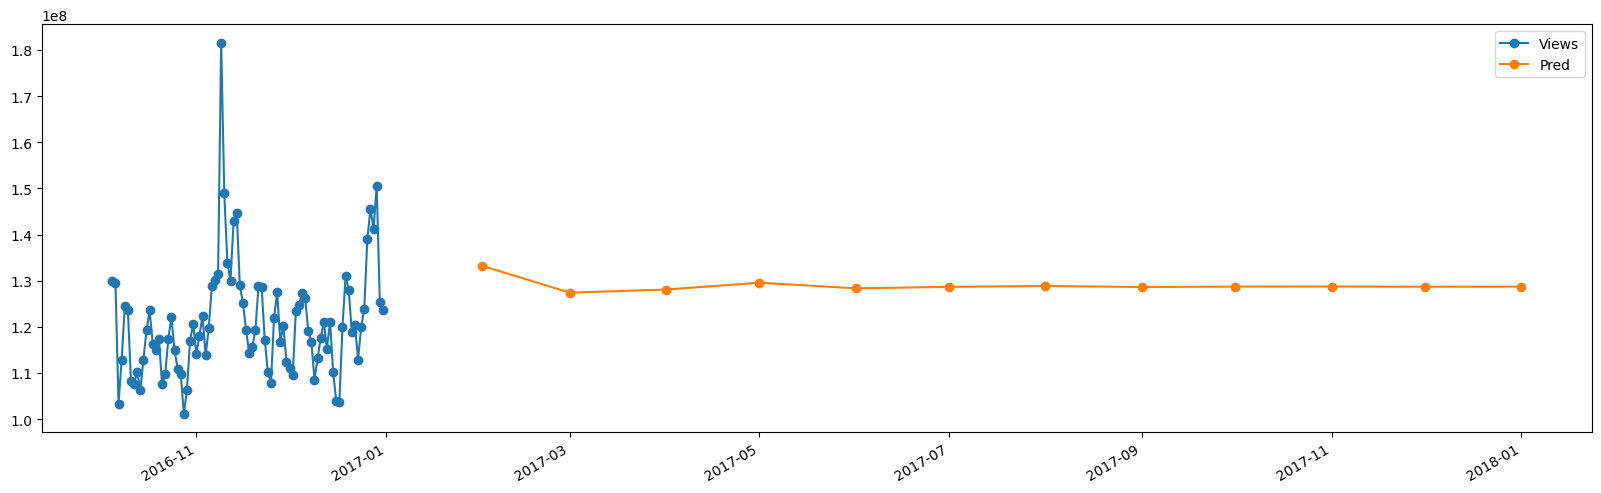

In [ ]:
df['Pred'] = pred

df.loc[~df['Views'].isna(), 'Pred'] = np.nan
df.tail(100).plot(style='-o',figsize=(20,6))

##performance of the Moving Averages model

MAE : 25004282.236
RMSE : 27022485.135
MAPE: 0.213


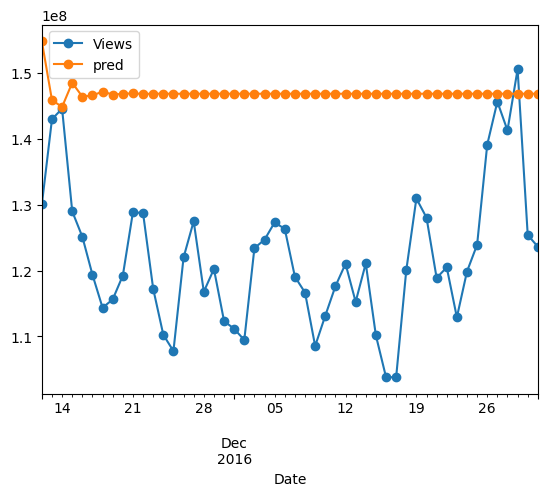

In [ ]:
df = train_x.copy()

df = pd.concat([df, pd.DataFrame(index=pd.date_range(start=df.index[-1], periods=50, freq='MS')[1:])])

pred = df.Views.dropna().values

for i in range(50):
  pred = np.append(pred, pred[-3:].mean())

test_x['pred'] = pred[-50:]
test_x.plot(style='-o')
performance(test_x['Views'], test_x['pred'])

##Simple exponential smoothing

In [ ]:
test_x.head()

Views          pred
Date                                 
2016-11-12  130035763.0  1.547907e+08
2016-11-13  142972124.0  1.458627e+08
2016-11-14  144571760.0  1.448404e+08
2016-11-15  128992025.0  1.484979e+08
2016-11-16  125139134.0  1.464003e+08

In [ ]:
# droping pred cloumn in test
test_x.drop('pred', axis=1, inplace=True)

In [ ]:
test_x.head()

Views
Date                   
2016-11-12  130035763.0
2016-11-13  142972124.0
2016-11-14  144571760.0
2016-11-15  128992025.0
2016-11-16  125139134.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


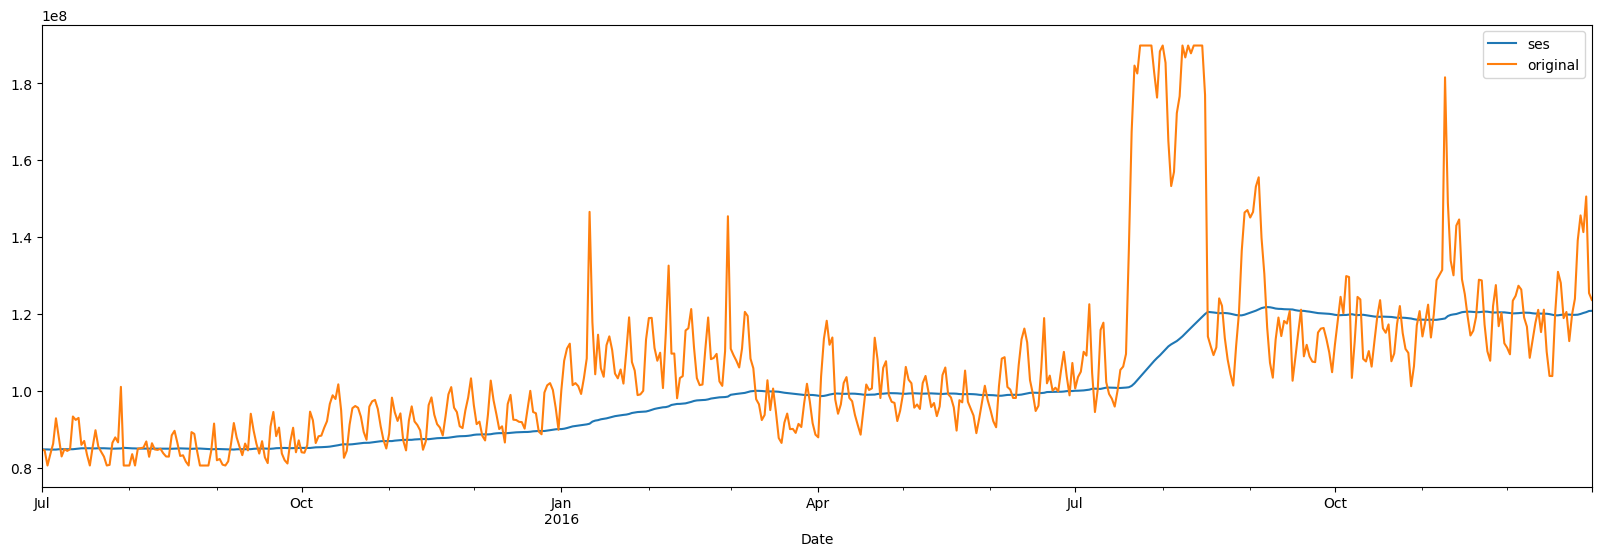

In [ ]:
import statsmodels.api as sm
model = pd.Series(sm.tsa.SimpleExpSmoothing(aggregated_data_en.Views).fit(smoothing_level=1/(2*50)).fittedvalues)

model.plot(label='ses')
aggregated_data_en.Views.plot(label='original',figsize=(20,6))
plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


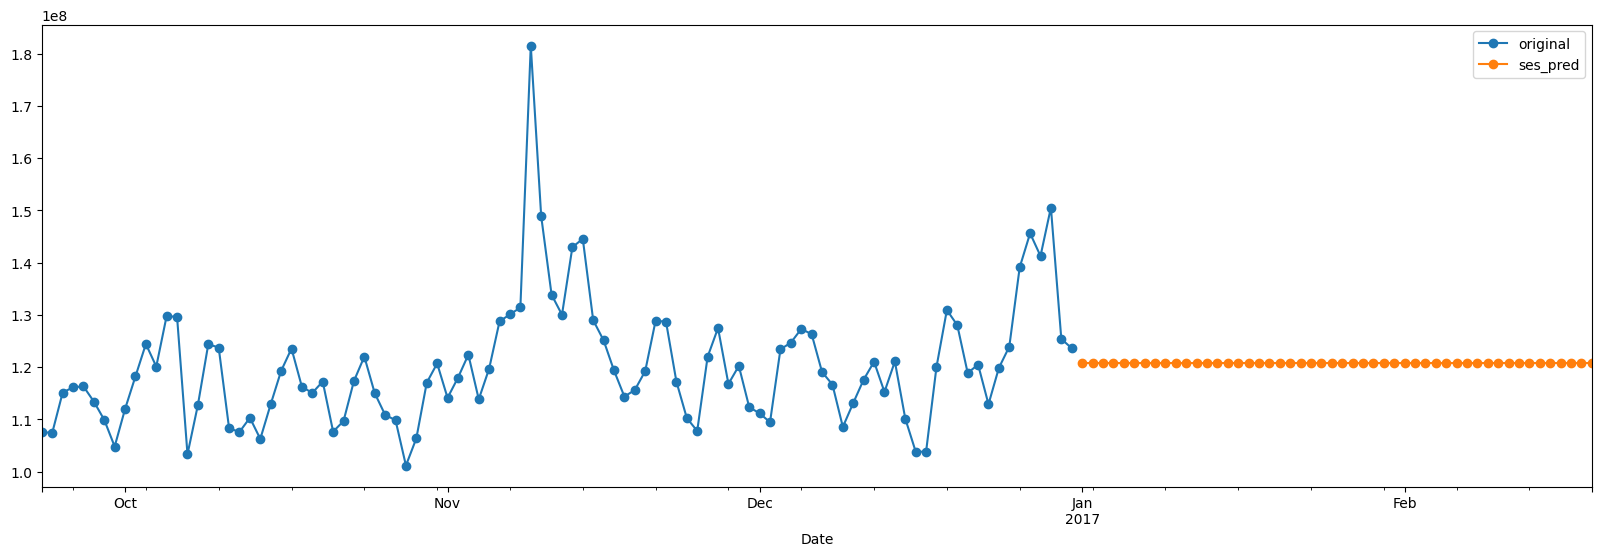

In [ ]:
model = sm.tsa.SimpleExpSmoothing(aggregated_data_en.Views).fit(smoothing_level=1/(2*50))
pred = model.forecast(steps = 50)

aggregated_data_en.Views.tail(100).plot(label='original', style='-o')

pred.plot(label='ses_pred', style='-o',figsize=(20,6))
plt.legend()

##performance of the Simple Exponential model

In [ ]:
test_x.isna().sum()

Views    0
dtype: int64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


MAE : 7981600.779
RMSE : 10785607.122
MAPE: 0.064


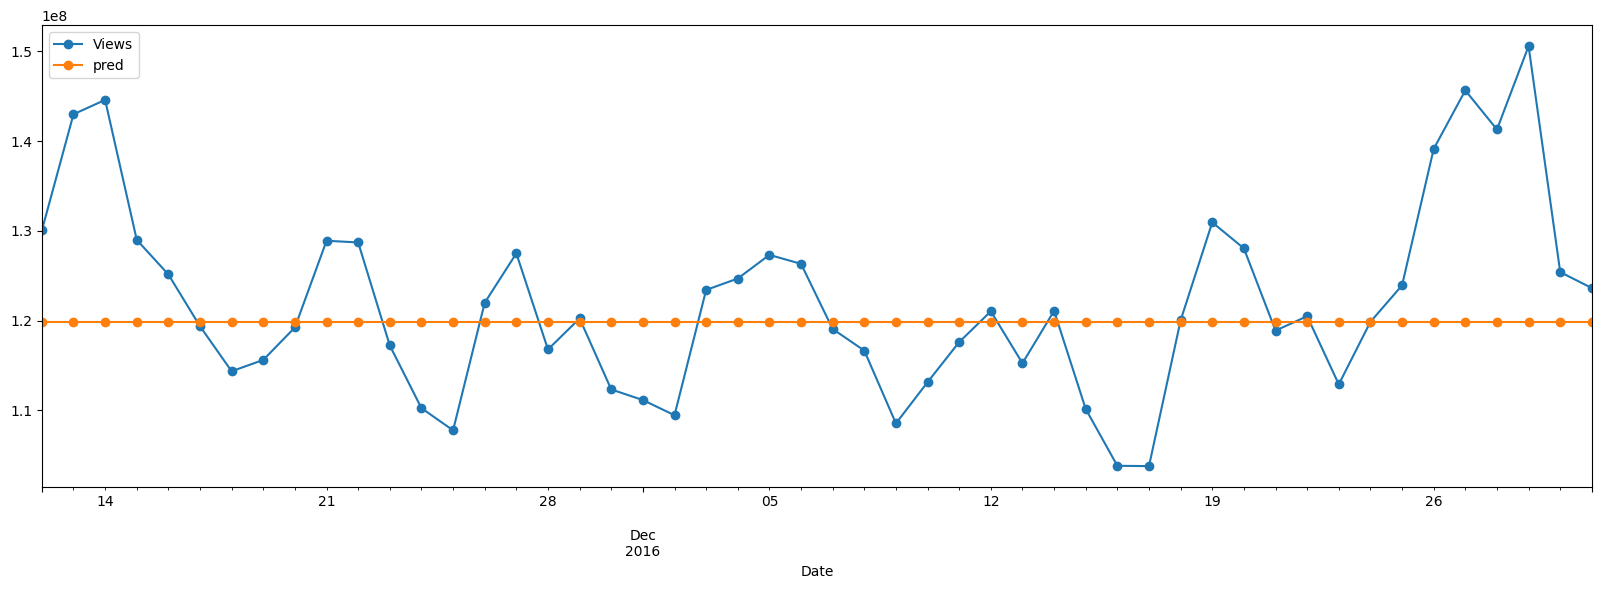

In [ ]:
model = sm.tsa.SimpleExpSmoothing(train_x.Views).fit(smoothing_level=1/(2*50))
test_x['pred'] = model.forecast(steps = 50)
test_x.plot(style='-o',figsize=(20,6))
performance(test_x['Views'], test_x['pred'])


##Double Exponential smoothing (Holt's method)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


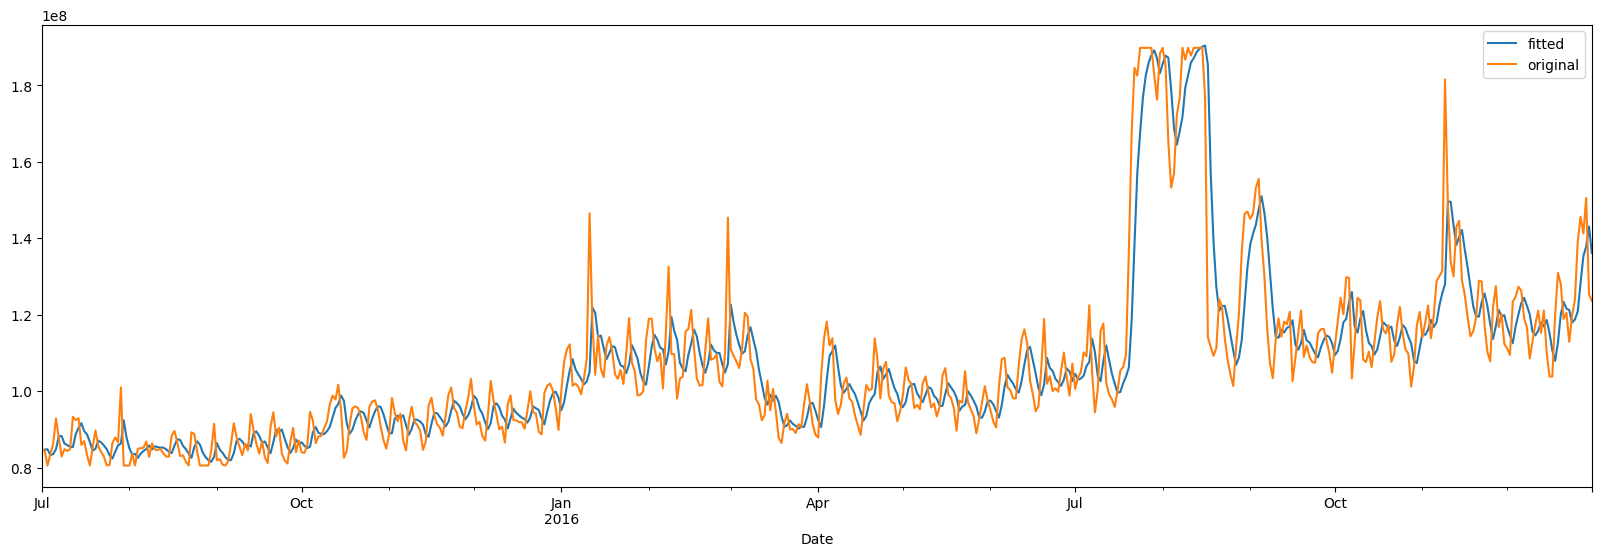

In [ ]:
model = sm.tsa.ExponentialSmoothing(aggregated_data_en, trend='add').fit(smoothing_level=0.4)
plt.figure(figsize=(20,6))
model.fittedvalues.plot(label='fitted')
aggregated_data_en.Views.plot(label='original')
plt.legend()

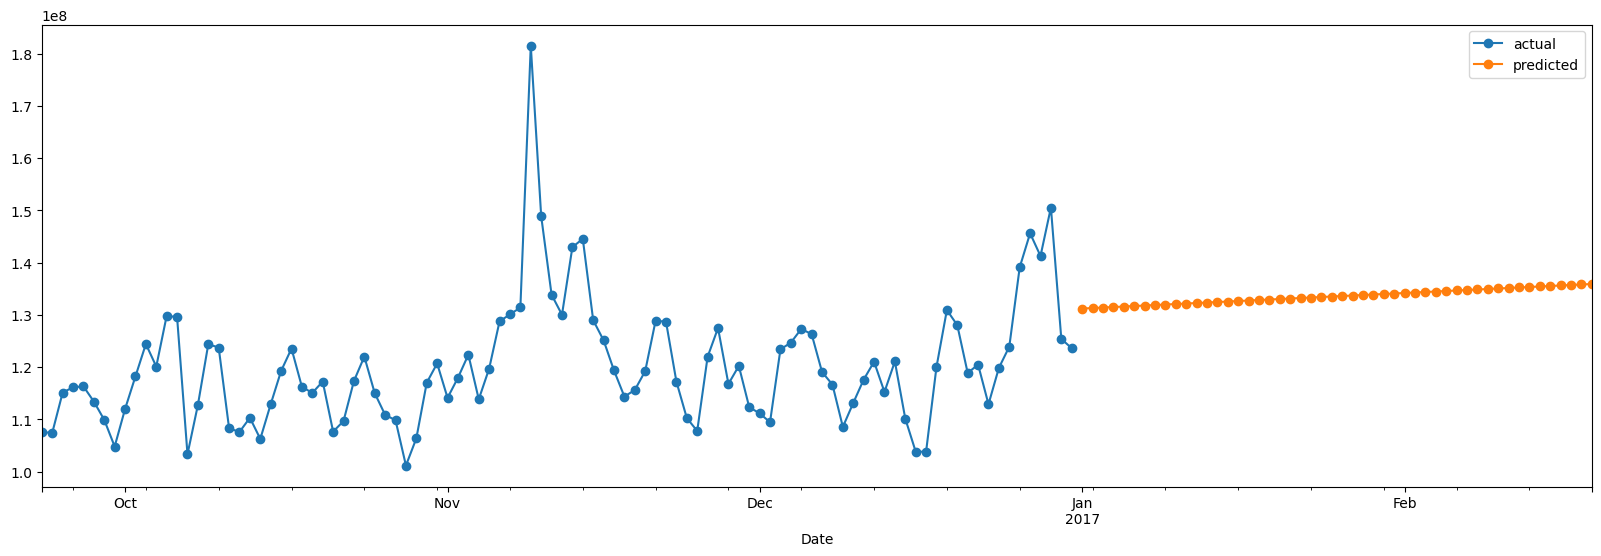

In [ ]:
pred = model.forecast(steps = 50)
aggregated_data_en.Views.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted',figsize=(20,6))
plt.legend()

##performance of the Double Exponential model

In [ ]:
test_x.isna().sum()

Views    0
pred     0
dtype: int64

In [ ]:
#drop the pred column
test_x.drop('pred', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAE : 13450731.417
RMSE : 15206876.599
MAPE: 0.115


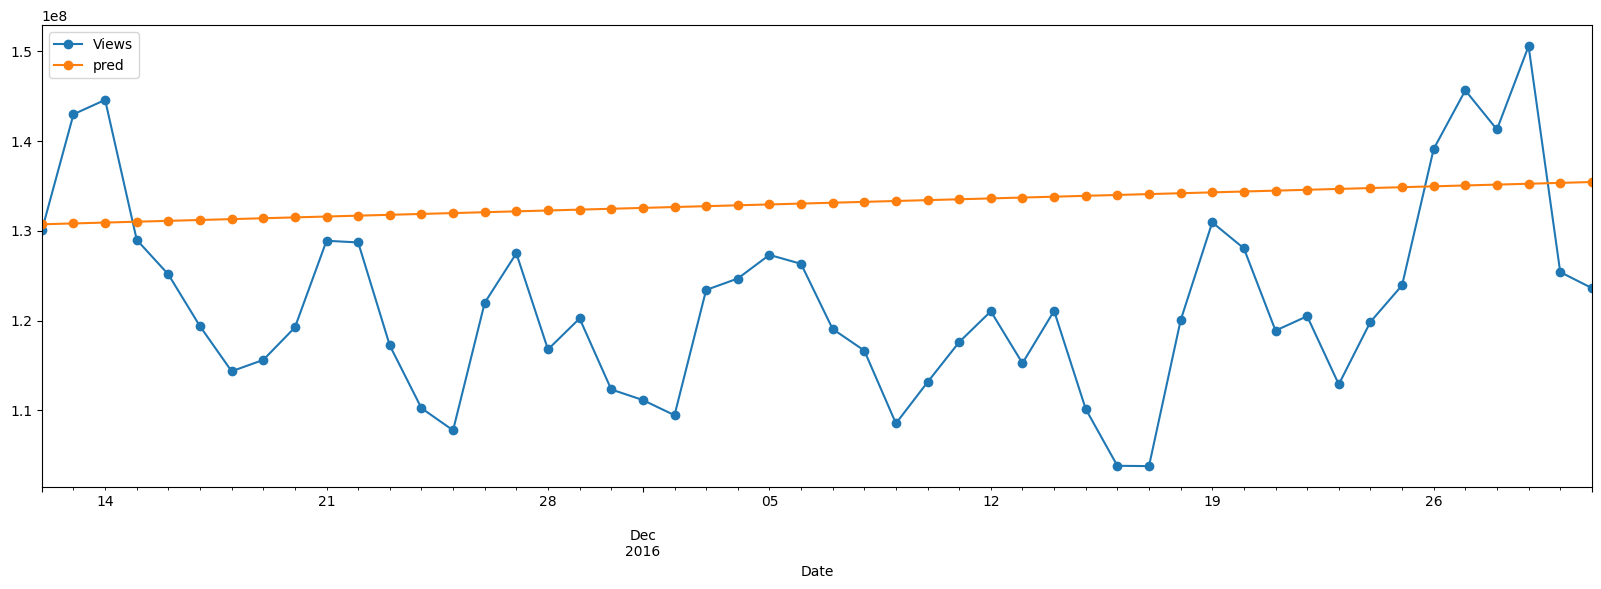

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_x.Views, trend='add').fit(smoothing_level=1/(2*50))
test_x['pred'] = model.forecast(steps = 50)
test_x.plot(style='-o',figsize=(20,6))
performance(test_x['Views'], test_x['pred'])

##Triple Exponential smoothing (aka Holt-Winters Method)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='Date'>

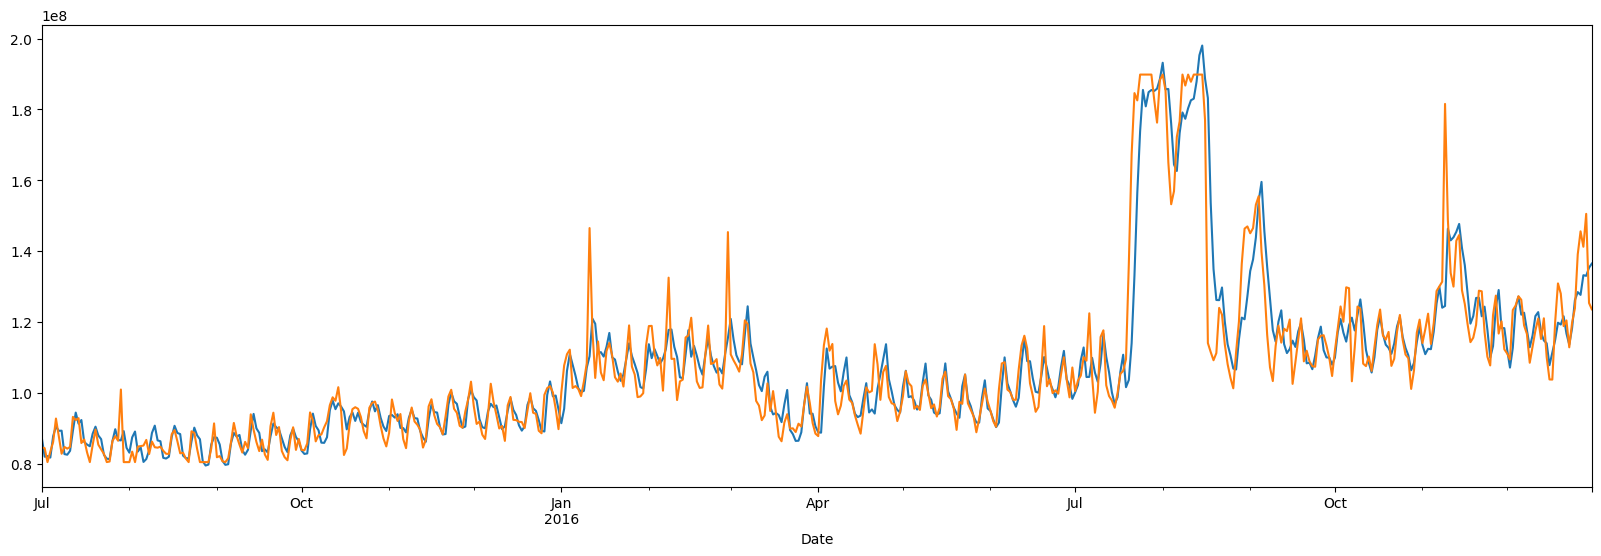

In [ ]:
model = sm.tsa.ExponentialSmoothing(aggregated_data_en.Views, trend='add', seasonal='add').fit(smoothing_level=0.4)
plt.figure(figsize=(20,6))
model.fittedvalues.plot()
aggregated_data_en.Views.plot()

<Axes: xlabel='Date'>

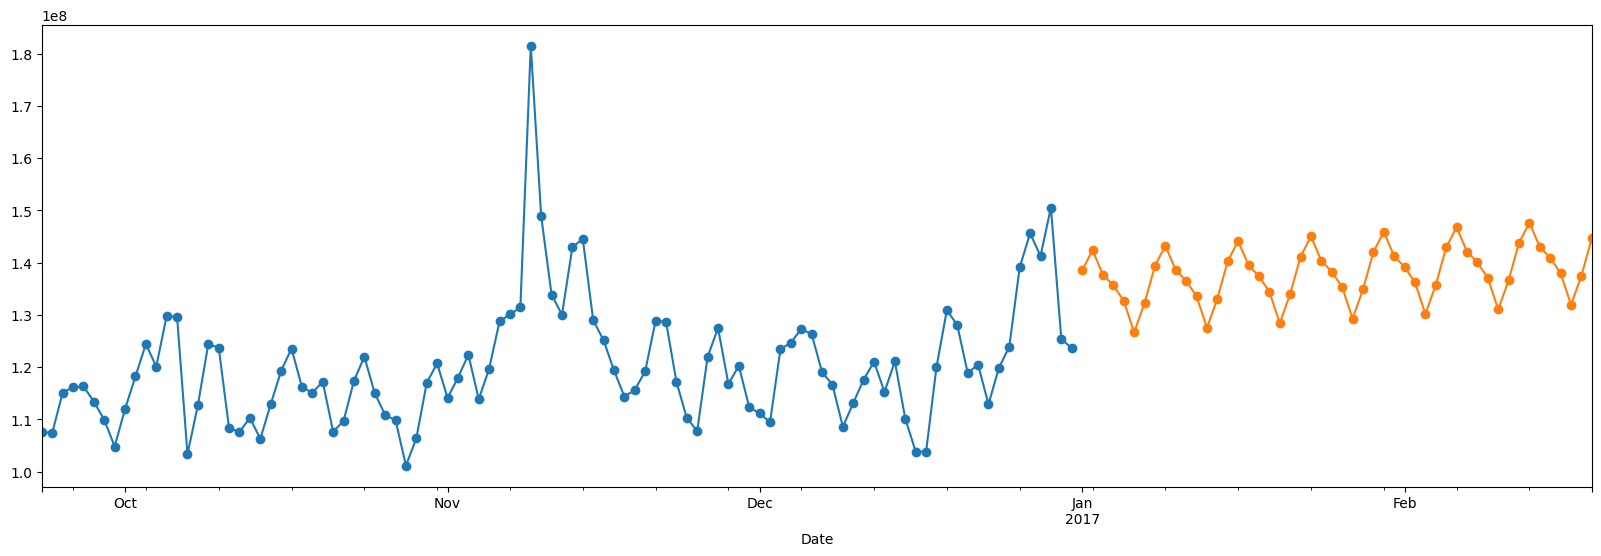

In [ ]:
pred = model.forecast(steps = 50)
plt.figure(figsize=(20,6))
aggregated_data_en.Views.tail(100).plot(style='-o')
pred.plot(style='-o')

## performance of the Triple Exponential model

In [ ]:
test_x.isna().sum()

Views    0
pred     0
dtype: int64

In [ ]:
#drop the pred column
test_x.drop('pred', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAE : 20200724.578
RMSE : 25426426.429
MAPE: 0.17


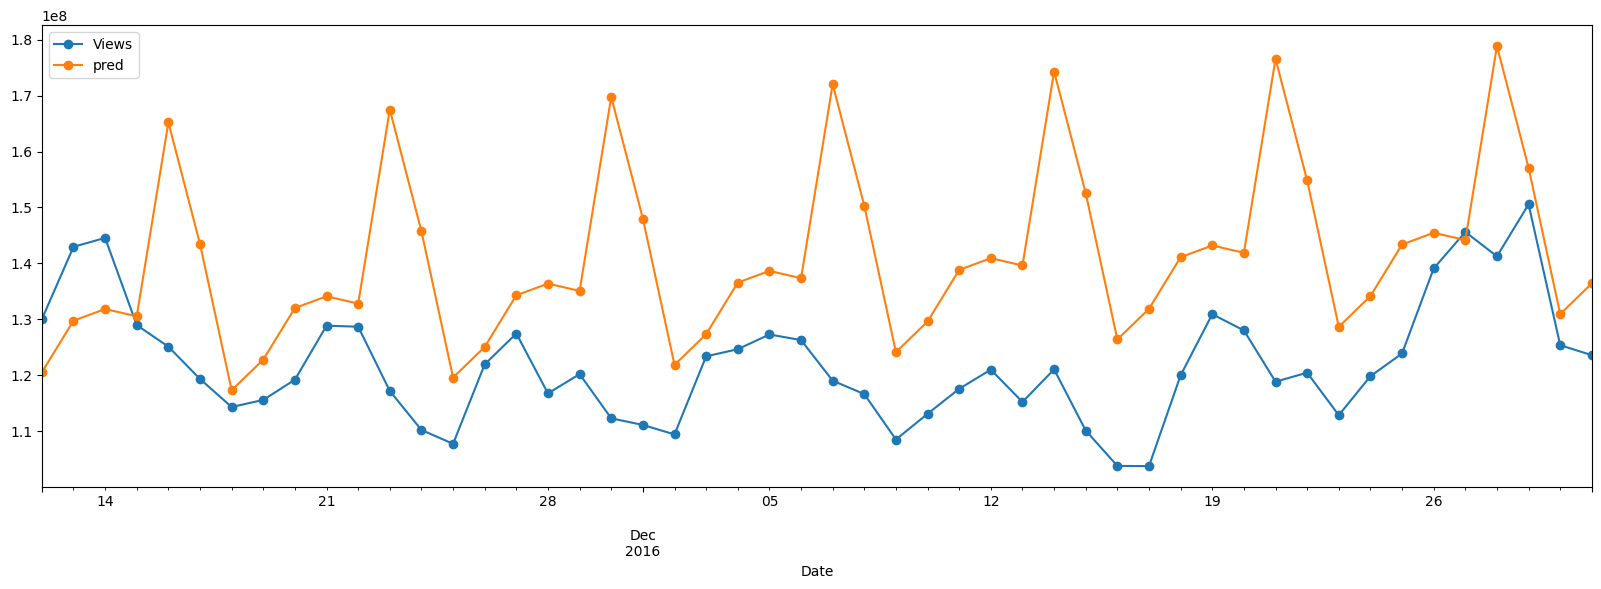

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_x.Views, trend='add', seasonal='add').fit(smoothing_level=1/(2*50))
test_x['pred'] = model.forecast(steps=50)
test_x.plot(style='-o',figsize=(20,6))
performance(test_x['Views'], test_x['pred'])

### PERFORMANCE OF SMOOTHING MODELS
**Overall Inference and Best Model Selection**

**Best Model:**

The Simple Exponential Smoothing model is best-suited for this dataset based on its lower error metrics across all categories (MAE, RMSE, MAPE). Its simplicity likely suits the data characteristics well, suggesting it’s useful for short-term forecasting where patterns are less complex.

MAE: 7,981,600.779

RMSE: 10,785,607.122

MAPE: 0.064 (6.4%)

**Analysis:**

Simple Exponential Smoothing does not consider trend or seasonality and is often best for data with no consistent pattern or for short-term forecasting. Here, it outperforms other models with the lowest MAE, RMSE, and MAPE, reflecting minimal error (6.4%).

**Considerations:**

If trend or seasonality is significant, Double or Triple Exponential Smoothing may offer better generalization. The Double Exponential model, with an MAPE of 11.5%, might be preferable if slight trend factors exist without strong seasonality.

Moving Averages might be omitted for this dataset, given its relatively high error rates, indicating that it may fail to capture essential dynamics within the time series.

##Dickey-Fuller Test

In [ ]:
sm.tsa.stattools.adfuller(aggregated_data_en.Views)[1]

0.1807777062246972

The pvalue of the timeseries is high, 0.18 approx.

So we can conclude that time series is not stationary.

In [ ]:
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')

In [ ]:
adf_test(aggregated_data_en.Views)

Sequence is not stationary


<Axes: xlabel='Date'>

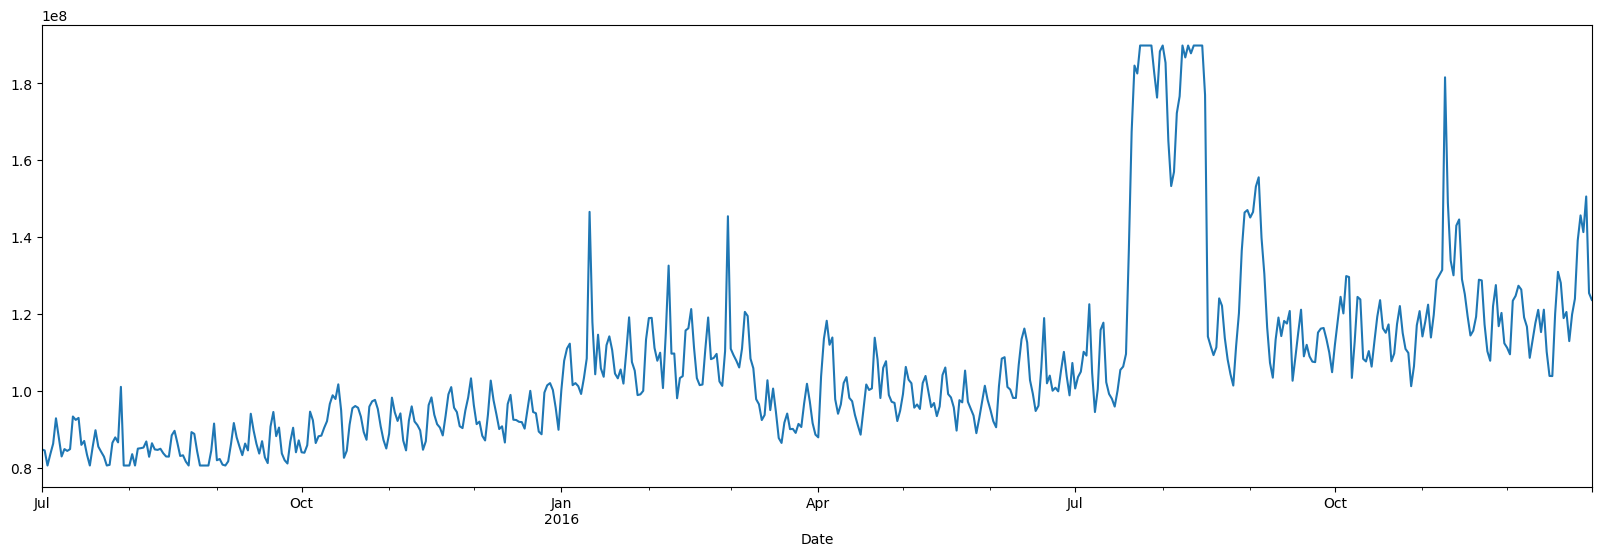

In [ ]:
plt.figure(figsize=(20,6))
aggregated_data_en.Views.plot()

<Axes: xlabel='Date'>

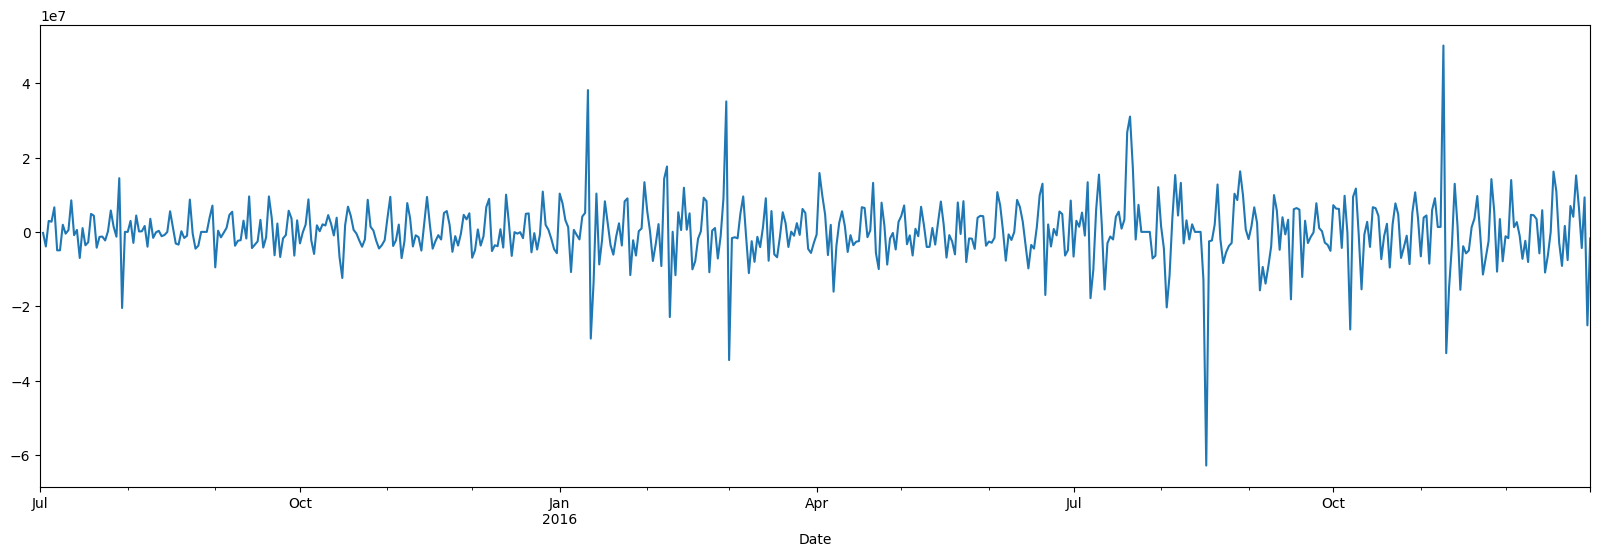

In [ ]:
## differencing
detrend = aggregated_data_en.Views.diff()
plt.figure(figsize=(20,6))
detrend.plot()

In [ ]:
adf_test(detrend.dropna())

Sequence is stationary


<Axes: xlabel='Date'>

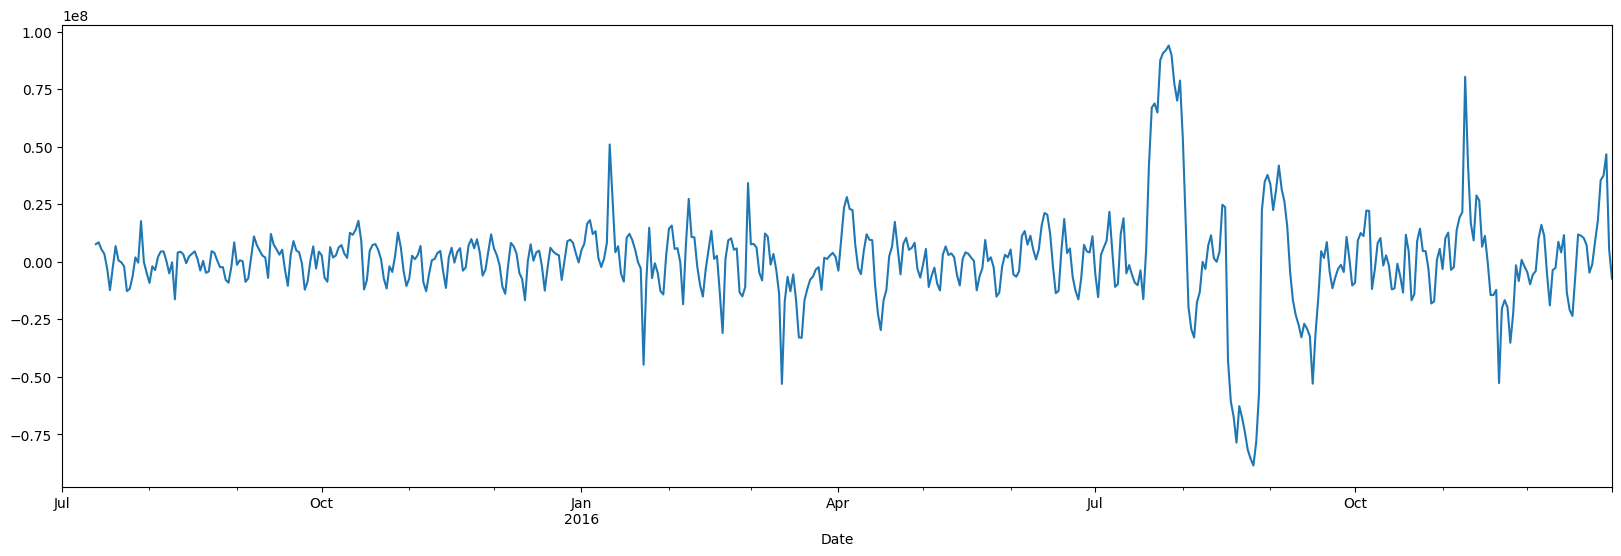

In [ ]:
##de-seasoning
deseas = aggregated_data_en.Views.diff(12)
plt.figure(figsize=(20,6))
deseas.plot()

##detrending AND deseasonalising

<Axes: xlabel='Date'>

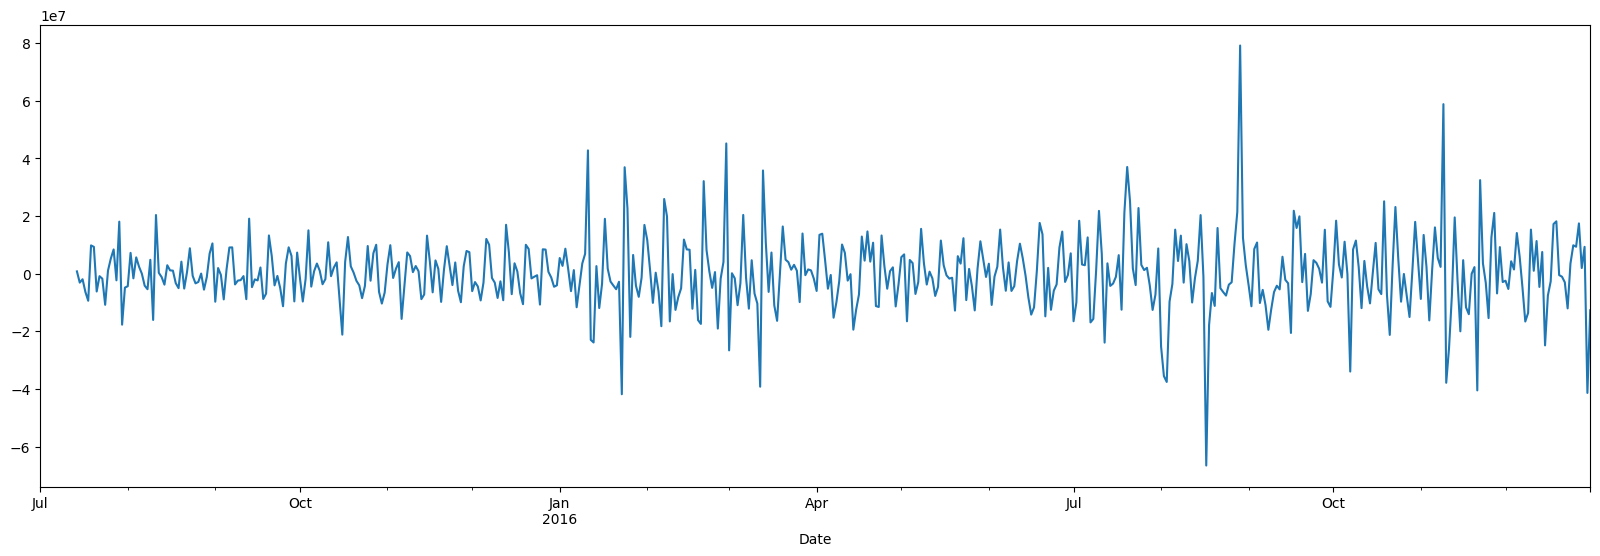

In [ ]:
stationary = aggregated_data_en.Views.diff(1).diff(12)
plt.figure(figsize=(20,6))
stationary.plot()

##AutoCorrelation and PartialAutoCorrelation

In [ ]:
##correlation between two time series

lag = 1
np.corrcoef(aggregated_data_en.Views[lag:], aggregated_data_en.Views.shift(lag)[lag:])[0][1]

0.9359158242341687

###ACF and PACF

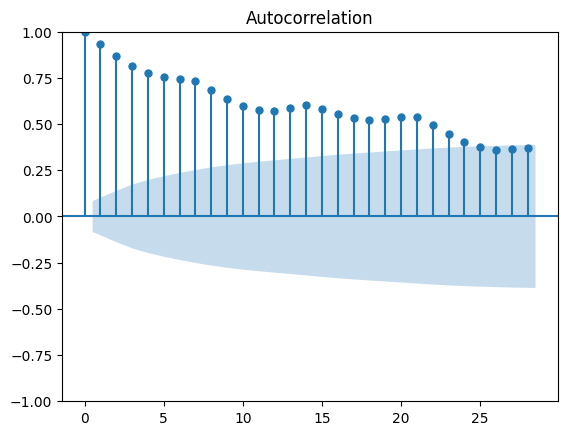

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(aggregated_data_en.Views);

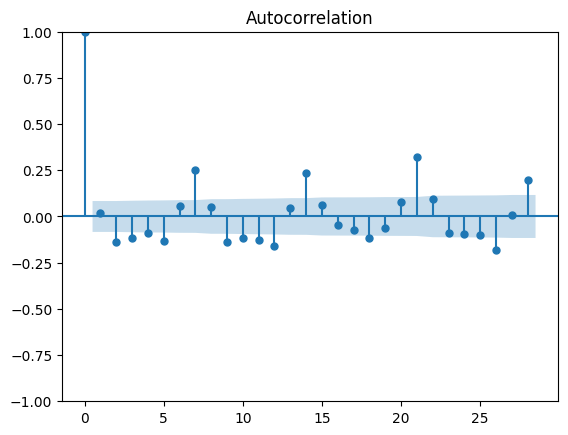

In [ ]:
##ACF plot for the de-trended series.

plot_acf(aggregated_data_en.Views.diff().dropna());


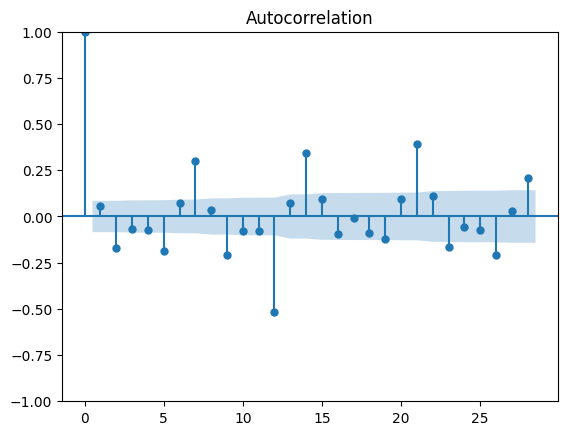

In [ ]:
##de-seasoning
plot_acf(aggregated_data_en.Views.diff().diff(12).dropna());

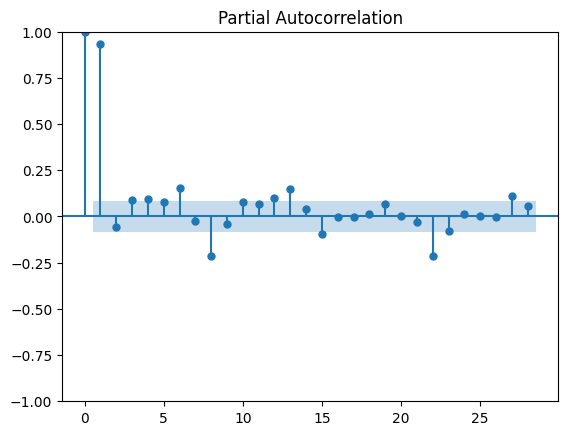

In [ ]:
##pacf

plot_pacf(aggregated_data_en.Views);

## AR Model

In [ ]:
train_x.head()

Views
Date                   
2015-07-01  84712190.00
2015-07-02  84438545.00
2015-07-03  80518513.72
2015-07-04  83463204.00
2015-07-05  86198637.00

In [ ]:
adf_test(train_x.Views)

Sequence is not stationary


In [ ]:
##de-trend it by taking a difference of 1
train_x_st = train_x.copy()
train_x_st.Views = train_x_st.Views.diff(1)
train_x_st.dropna(inplace=True)
adf_test(train_x_st.Views)

Sequence is stationary


In [ ]:
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
test_x.head()

Views          pred
Date                                 
2016-11-12  130035763.0  1.205619e+08
2016-11-13  142972124.0  1.297806e+08
2016-11-14  144571760.0  1.318690e+08
2016-11-15  128992025.0  1.305637e+08
2016-11-16  125139134.0  1.652104e+08

In [ ]:
## DROP PRED
test_x.drop('pred', axis=1, inplace=True)

In [ ]:
model = SARIMAX(train_x_st.Views, order=(1, 0, 0))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)
test_x['pred'].head(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Date
2016-11-12   -2.352734e+05
2016-11-13   -3.675068e+03
2016-11-14   -5.740610e+01
2016-11-15   -8.967071e-01
2016-11-16   -1.400694e-02
2016-11-17   -2.187942e-04
2016-11-18   -3.417656e-06
2016-11-19   -5.338520e-08
2016-11-20   -8.338991e-10
2016-11-21   -1.302585e-11
2016-11-22   -2.034692e-13
2016-11-23   -3.178273e-15
2016-11-24   -4.964595e-17
2016-11-25   -7.754903e-19
2016-11-26   -1.211348e-20
2016-11-27   -1.892176e-22
2016-11-28   -2.955658e-24
2016-11-29   -4.616860e-26
2016-11-30   -7.211727e-28
2016-12-01   -1.126502e-29
Name: pred, dtype: float64

In [ ]:
# Integrate !!

test_x['pred'] = test_x['pred'].cumsum() + train_x.Views[-1]

MAE : 14016029.855
RMSE : 15622028.687
MAPE: 0.119


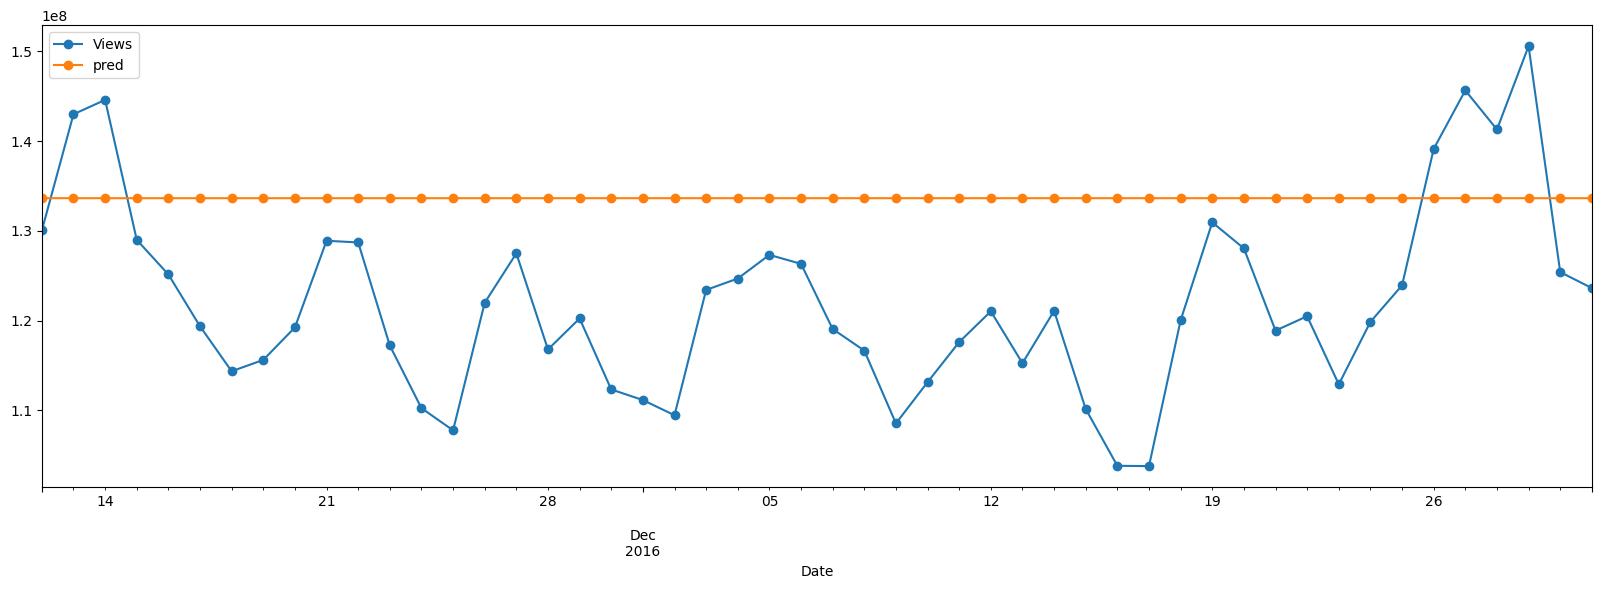

In [ ]:
test_x.plot(style='-o',figsize=(20,6))
performance(test_x['Views'], test_x['pred'])

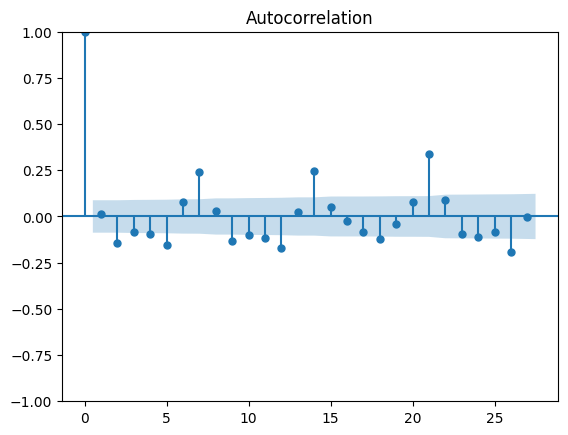

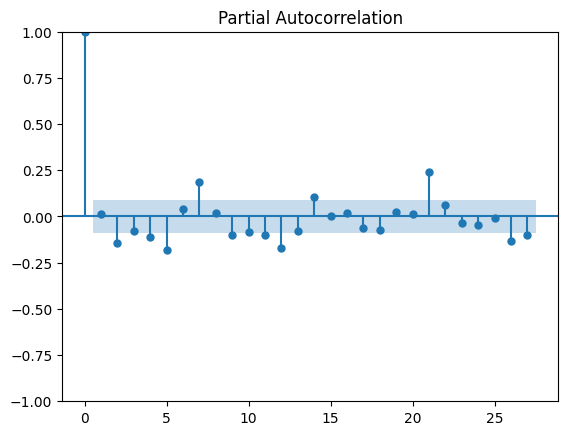

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(train_x_st.Views);
plot_pacf(train_x_st.Views);

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 18102602.17
RMSE : 20012411.628
MAPE: 0.155


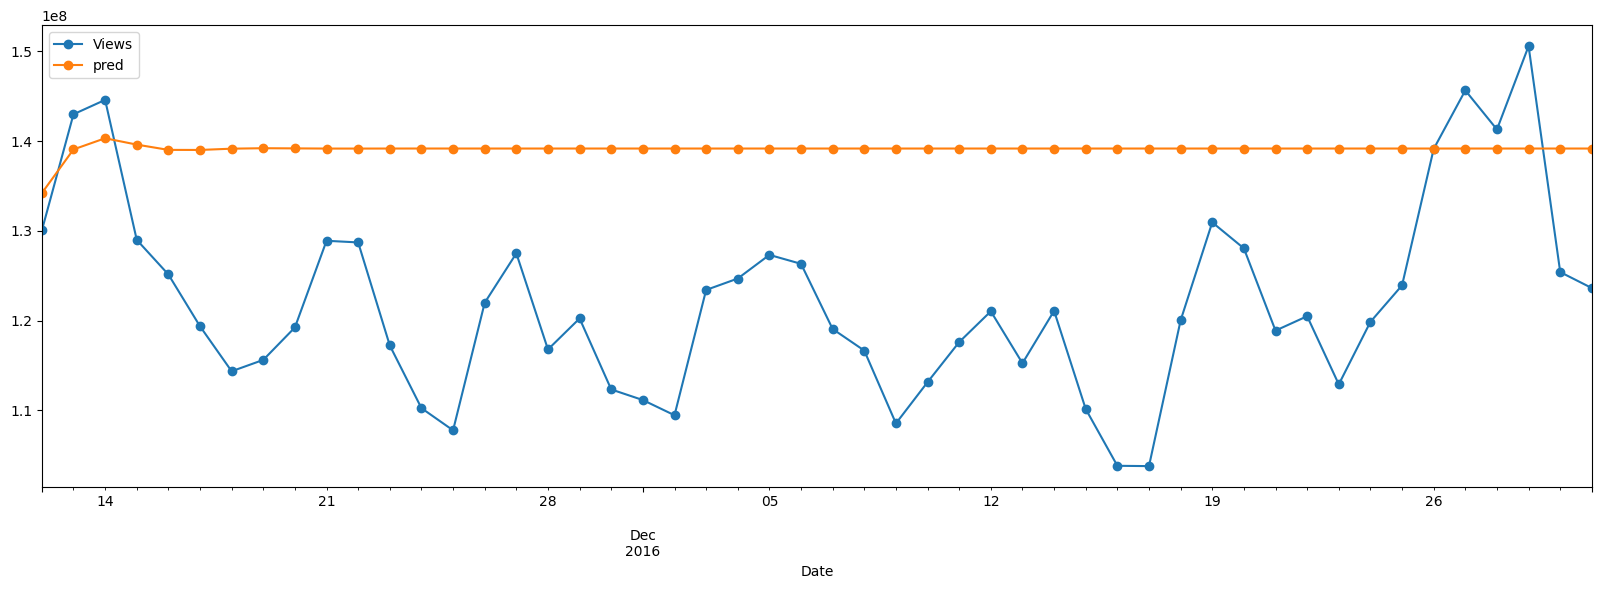

In [ ]:
model = SARIMAX(train_x_st.Views, order=(3, 0, 0))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)

# Integrating the trend back!
test_x['pred'] = test_x['pred'].cumsum() + train_x.Views[-1]

# Plotting

test_x.plot(style='-o',figsize=(20,6))
performance(test_x['Views'], test_x['pred'])

##Moving Averages (MA)

In [ ]:
test_x.head()

Views          pred
Date                                 
2016-11-12  130035763.0  1.341942e+08
2016-11-13  142972124.0  1.390582e+08
2016-11-14  144571760.0  1.403013e+08
2016-11-15  128992025.0  1.395938e+08
2016-11-16  125139134.0  1.390068e+08

In [ ]:
test_x.drop('pred', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 17995049.811
RMSE : 19876173.5
MAPE: 0.154


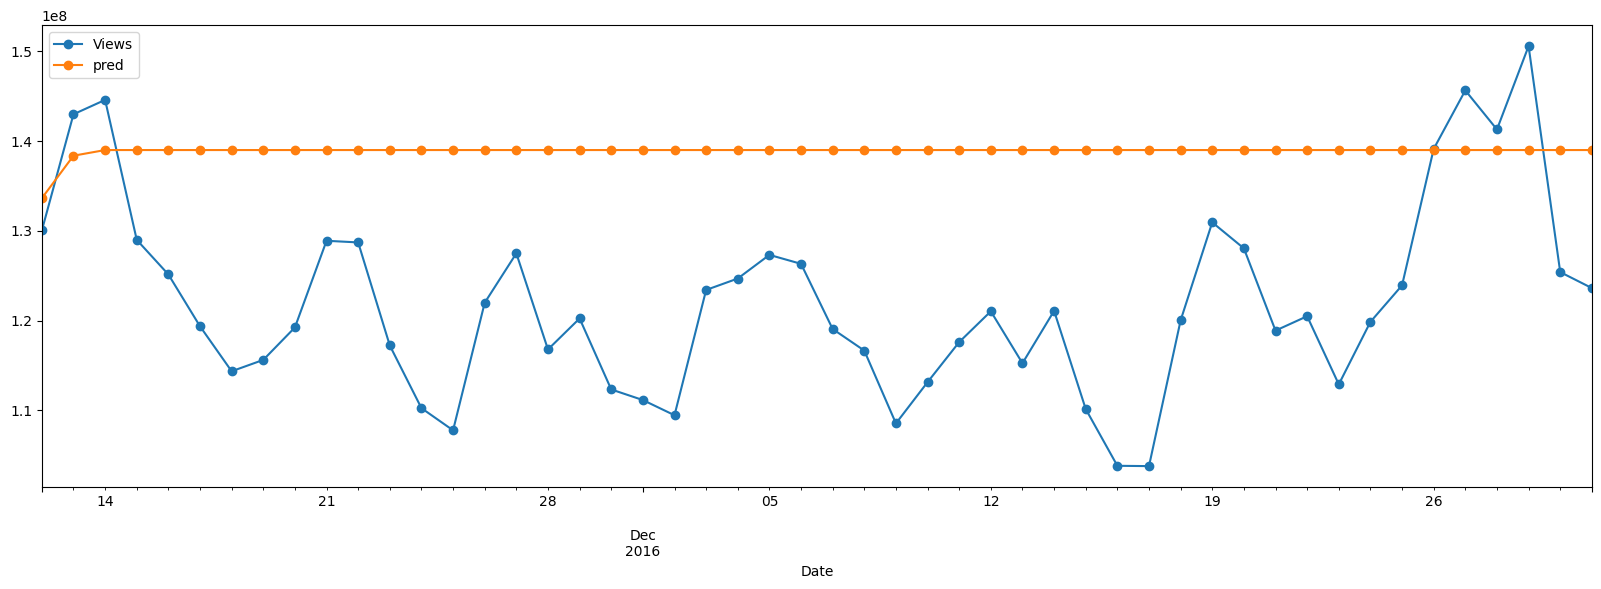

In [ ]:
model = SARIMAX(train_x_st.Views, order=(0, 0, 3))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)

test_x['pred'] = test_x['pred'].cumsum() + train_x.Views[-1]

test_x.plot(style='-o',figsize=(20,6))
performance(test_x['Views'], test_x['pred'])

##Auto Regression - Moving Averages (ARMA)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 13741340.588
RMSE : 15376481.074
MAPE: 0.117


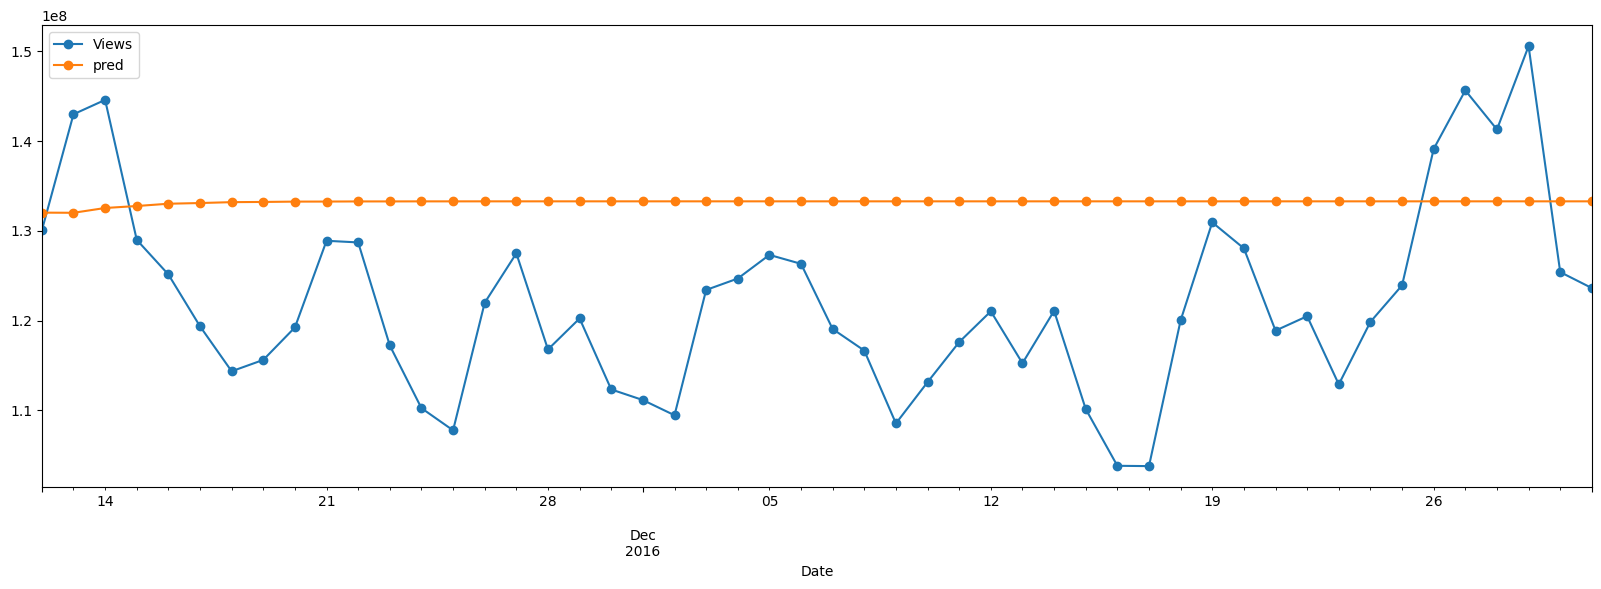

In [ ]:
model = SARIMAX(train_x_st.Views, order=(3, 0, 2))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)

test_x['pred'] = test_x['pred'].cumsum() + train_x.Views[-1]

test_x.plot(style='-o',figsize=(20,6))
performance(test_x['Views'], test_x['pred'])

##ARIMA

In [ ]:
test_x.head()

Views          pred
Date                                 
2016-11-12  130035763.0  1.320225e+08
2016-11-13  142972124.0  1.320048e+08
2016-11-14  144571760.0  1.325381e+08
2016-11-15  128992025.0  1.327579e+08
2016-11-16  125139134.0  1.330125e+08

In [ ]:
test_x.drop('pred', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 15471600.208
RMSE : 16920955.278
MAPE: 0.132


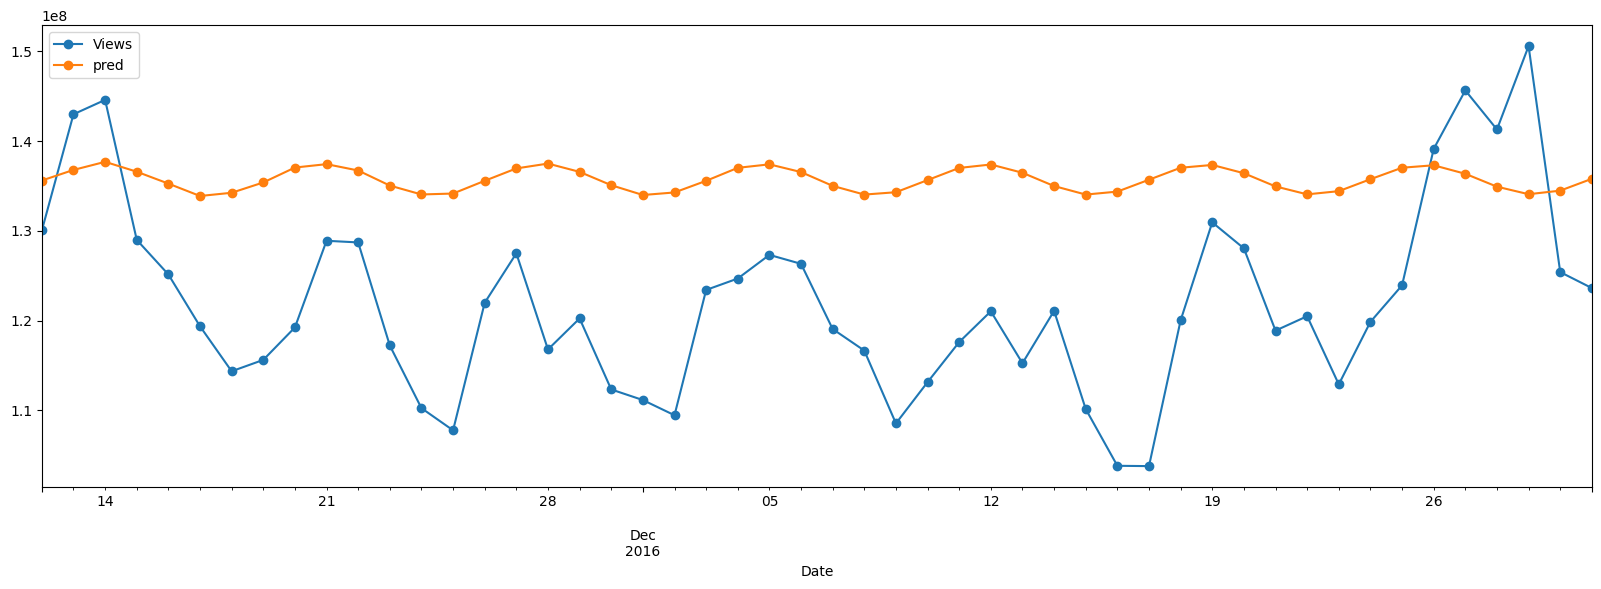

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x.Views, order=(3, 1, 3))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)
test_x.plot(style='-o',figsize=(20,6))
performance(test_x['Views'], test_x['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 19723890.459
RMSE : 21816544.531
MAPE: 0.169


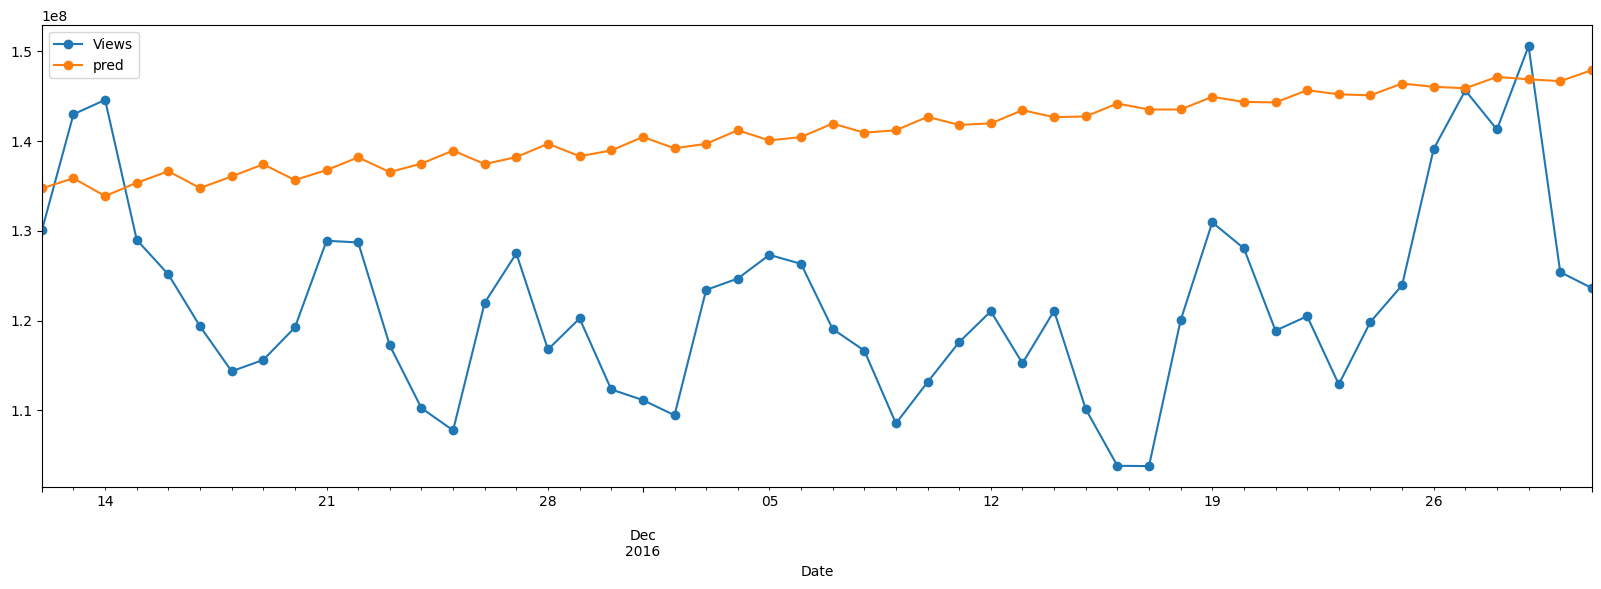

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x.Views, order=(3, 2, 3))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)
test_x.plot(style='-o',figsize=(20,6))
performance(test_x['Views'], test_x['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 24140798.325
RMSE : 26260642.817
MAPE: 0.206


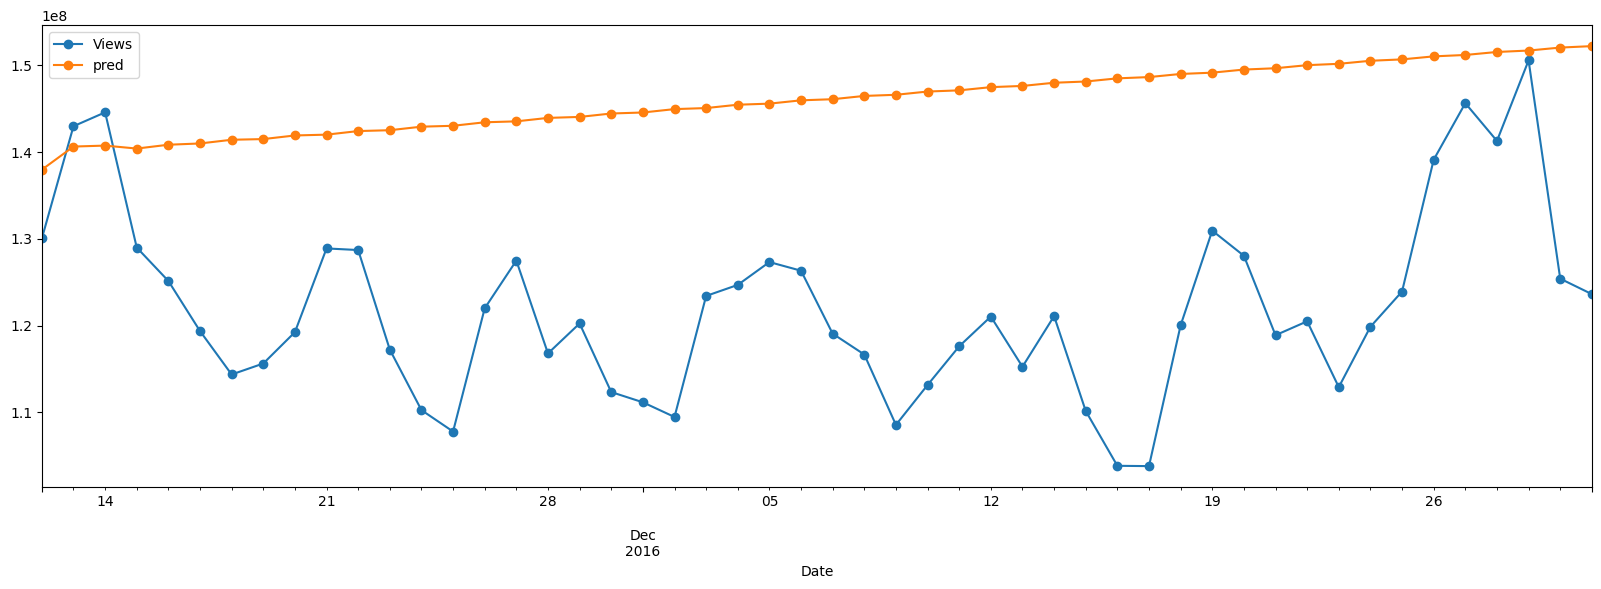

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x.Views, order=(3, 2, 2))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)
test_x.plot(style='-o',figsize=(20,6))
performance(test_x['Views'], test_x['pred'])

##SARIMA

In [ ]:
test_x.head()

Views          pred
Date                                 
2016-11-12  130035763.0  1.379641e+08
2016-11-13  142972124.0  1.406298e+08
2016-11-14  144571760.0  1.407401e+08
2016-11-15  128992025.0  1.403988e+08
2016-11-16  125139134.0  1.408393e+08

In [ ]:
test_x.drop('pred', axis=1, inplace=True)

In [ ]:
test_x.isna().sum()

Views    0
dtype: int64

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 18372954.28
RMSE : 20600453.77
MAPE: 0.156


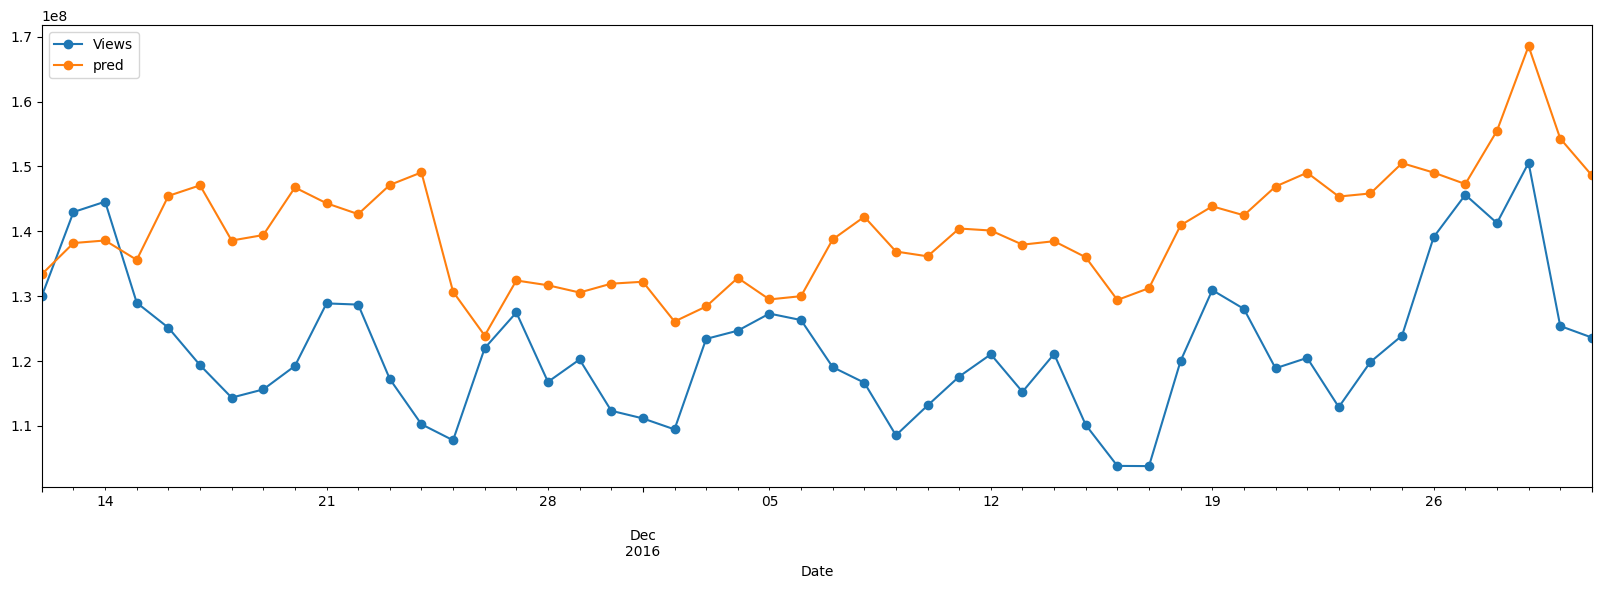

In [ ]:
train_x = train_x.asfreq('D')
test_x = test_x.asfreq('D')

model = SARIMAX(train_x.Views, order=(3, 1, 3), seasonal_order=(1,1,1,50))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)
test_x.plot(style='-o',figsize=(20,6))
performance(test_x['Views'], test_x['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 11445292.846
RMSE : 13532224.062
MAPE: 0.097


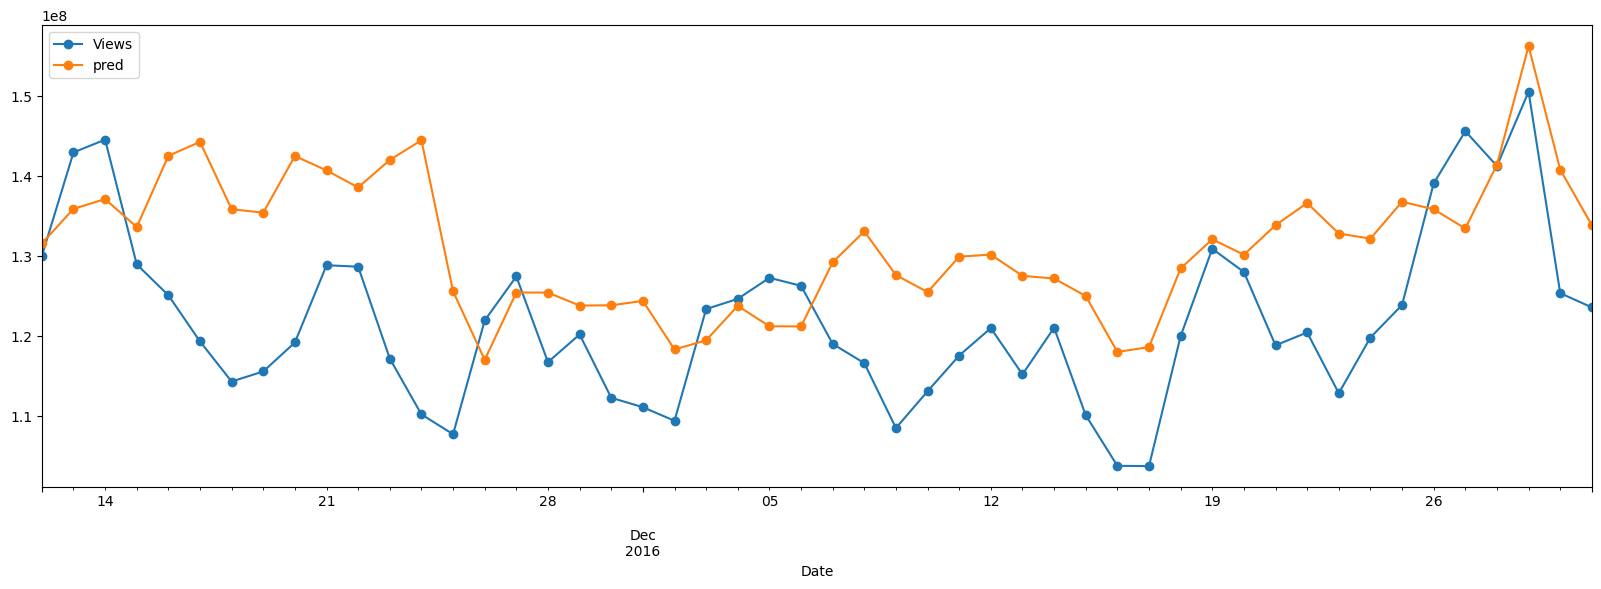

In [ ]:
model = SARIMAX(train_x.Views, order=(3, 2, 3), seasonal_order=(1,1,1,50))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=50)
test_x.plot(style='-o',figsize=(20,6))
performance(test_x['Views'], test_x['pred'])

In [ ]:
aggregated_data_en.head()

Views
Date                   
2015-07-01  84712190.00
2015-07-02  84438545.00
2015-07-03  80518513.72
2015-07-04  83463204.00
2015-07-05  86198637.00

In [ ]:
aggregated_data_en.reset_index(inplace=True)

In [ ]:
!pip install prophet
from prophet import Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfevah06/82l3_zxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqfevah06/_uzgqp7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92749', 'data', 'file=/tmp/tmpqfevah06/82l3_zxg.json', 'init=/tmp/tmpqfevah06/_uzgqp7m.json', 'output', 'file=/tmp/tmpqfevah06/prophet_modelndny_tc9/prophet_model-20241025081420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


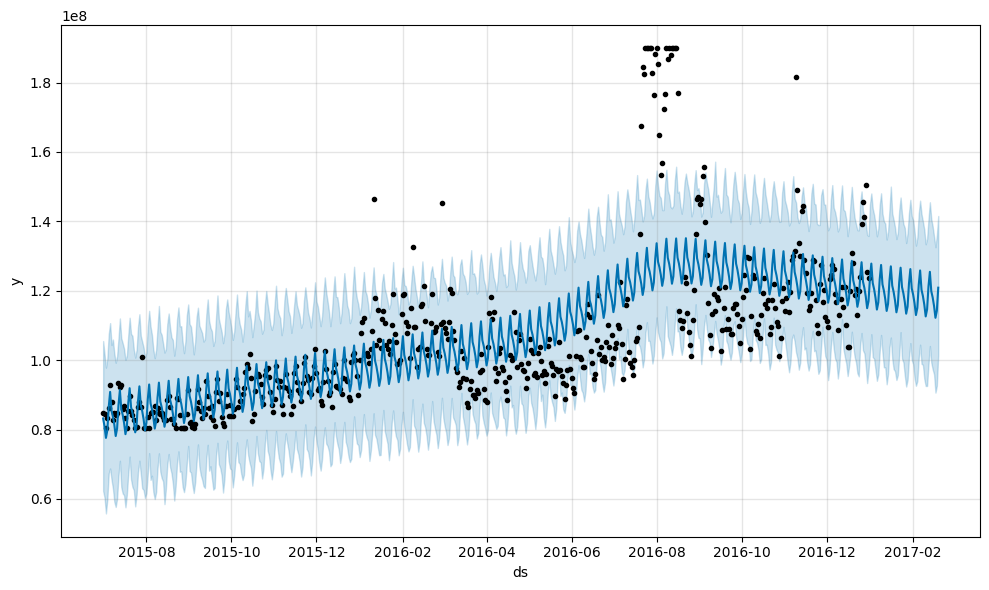

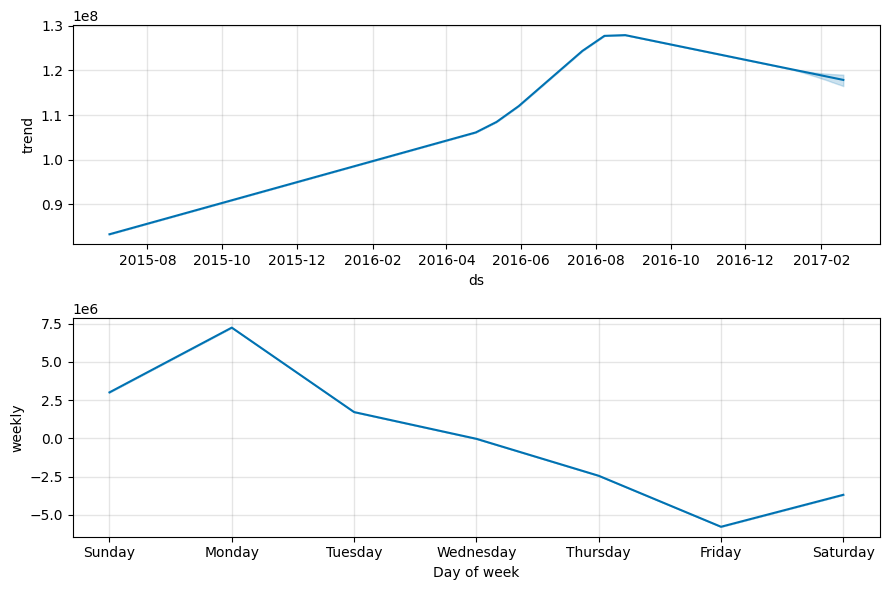

In [ ]:
# Preparing data for Prophet
prophet_df = aggregated_data_en[['Date', 'Views']].rename(columns={'Date': 'ds', 'Views': 'y'})

# Prophet Model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Forecast for 50 days
future = prophet_model.make_future_dataframe(periods=50)
forecast = prophet_model.predict(future)

# Plotting Prophet forecast
prophet_model.plot(forecast)
plt.show()

# Prophet components (trend, seasonality)
prophet_model.plot_components(forecast)
plt.show()


In [ ]:
forecast.tail(4)

ds         trend    yhat_lower    yhat_upper   trend_lower  \
596 2017-02-16  1.180543e+08  9.591209e+07  1.356145e+08  1.168112e+08   
597 2017-02-17  1.179978e+08  9.064481e+07  1.325441e+08  1.167197e+08   
598 2017-02-18  1.179413e+08  9.266070e+07  1.359453e+08  1.166049e+08   
599 2017-02-19  1.178848e+08  1.015494e+08  1.415563e+08  1.164900e+08   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
596  1.190989e+08   -2.449136e+06         -2.449136e+06         -2.449136e+06   
597  1.190962e+08   -5.784139e+06         -5.784139e+06         -5.784139e+06   
598  1.190732e+08   -3.693673e+06         -3.693673e+06         -3.693673e+06   
599  1.190718e+08    3.003894e+06          3.003894e+06          3.003894e+06   

           weekly  weekly_lower  weekly_upper  multiplicative_terms  \
596 -2.449136e+06 -2.449136e+06 -2.449136e+06                   0.0   
597 -5.784139e+06 -5.784139e+06 -5.784139e+06                   0.0   
598 -3.693673e+06 -3.693673e+06 -3.693673e+06                   0.0   
599  3.003894e+06  3.003894e+06  3.003894e+06                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
596                         0.0                         0.0  1.156052e+08  
597                         0.0                         0.0  1.122137e+08  
598                         0.0                         0.0  1.142476e+08  
599                         0.0                         0.0  1.208887e+08

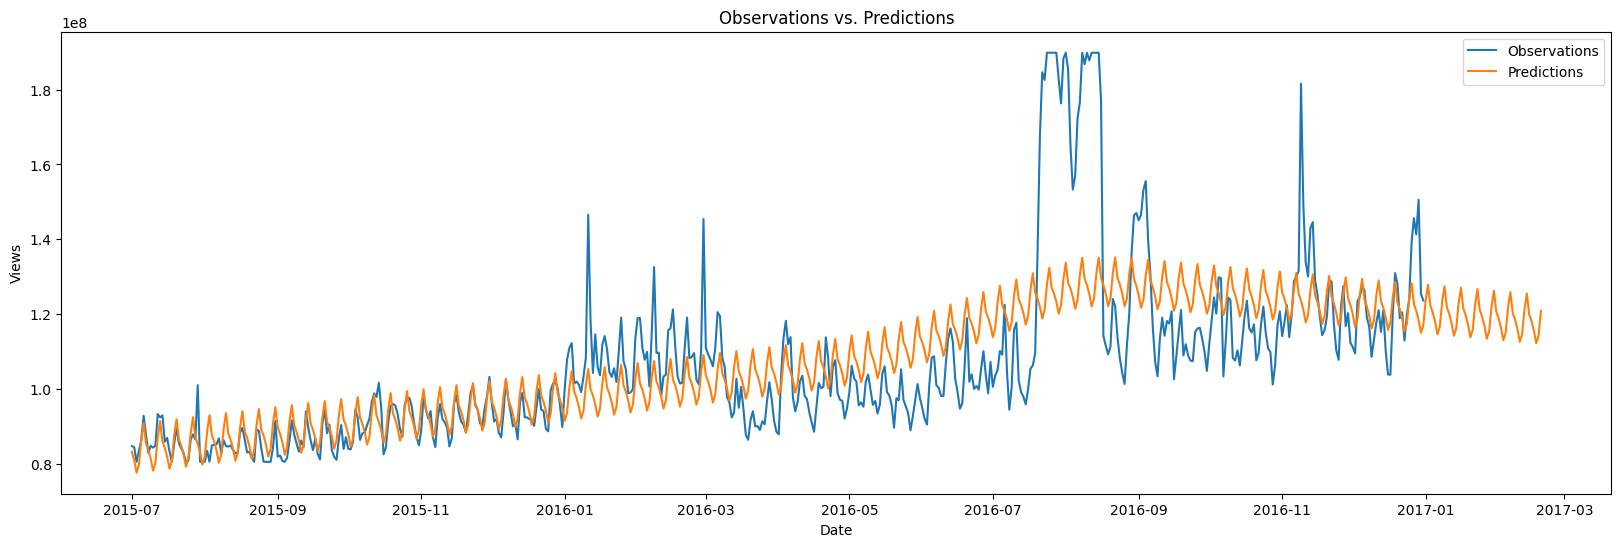

In [ ]:
#plotting the observations and predictions of the views
plt.figure(figsize=(20, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Observations')
plt.plot(forecast['ds'], forecast['yhat'], label='Predictions')
plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Observations vs. Predictions')
plt.legend()
plt.show()

In [ ]:
## checking the performance
forecast_subset = forecast.iloc[:len(prophet_df)]  # Select only the first len(prophet_df) rows of forecast


performance(prophet_df['y'], forecast_subset['yhat'])

MAE : 10390978.253
RMSE : 16121538.82
MAPE: 0.087


**Overall Inference and Best Model Selection**

**Best Model:**

The SARIMA model is the best-performing model based on error metrics. Its ability to incorporate seasonal trends and non-seasonal components is particularly valuable for this dataset, as indicated by the lowest MAE, RMSE, and MAPE values.

MAE: 11,445,292.846

RMSE: 13,532,224.062

MAPE: 0.097 (9.7%)

**Analysis:**

The SARIMA model outperforms all other models with the lowest MAE, RMSE, and MAPE values, indicating that it effectively captures both seasonal and non-seasonal patterns in the data. The model’s MAPE of 9.7% reflects high accuracy, making it the best-suited model for this dataset.

MAE: 10,390,978.253

RMSE: 16,121,538.82

MAPE: 0.087 (8.7%)

**Analysis**

The Prophet model achieves a MAPE of 8.7%, which is lower than most of the other models except for SARIMA. With a lower MAE and competitive RMSE, Prophet is highly effective for this time series dataset.

**Comparison with SARIMA and Other Models**

The SARIMA model still slightly outperforms Prophet in terms of RMSE and MAE, with a MAPE of 9.7%. However, the Prophet model’s MAPE of 8.7% reflects higher accuracy, suggesting Prophet might generalize better when trends and seasonality are more varied.

**Considerations:**

Prophet for a more flexible, robust model suited for complex seasonality and varied patterns.

SARIMA if seasonality is well-defined and consistency across series is desired.

ARMA performs well with 11.7% MAPE, making it a viable choice if a simpler model is needed without explicit seasonality.

AR(1) also shows reasonable performance and can be useful for short-term forecasting where simpler models are preferred.

###SPANISH

In [ ]:
# Lets make an model for language spanish
aggregated_data_es = aggregated_data[aggregated_data['language'] == 'es'][['Date', 'Views']]
aggregated_data_es.head()

Date       Views
1650 2015-07-01  15278553.0
1651 2015-07-02  14601013.0
1652 2015-07-03  13427632.0
1653 2015-07-04  12606538.0
1654 2015-07-05  13710356.0

In [ ]:
# set index as date
aggregated_data_es.set_index('Date', inplace=True)

aggregated_data_es.head()

Views
Date                  
2015-07-01  15278553.0
2015-07-02  14601013.0
2015-07-03  13427632.0
2015-07-04  12606538.0
2015-07-05  13710356.0

<Axes: xlabel='Date'>

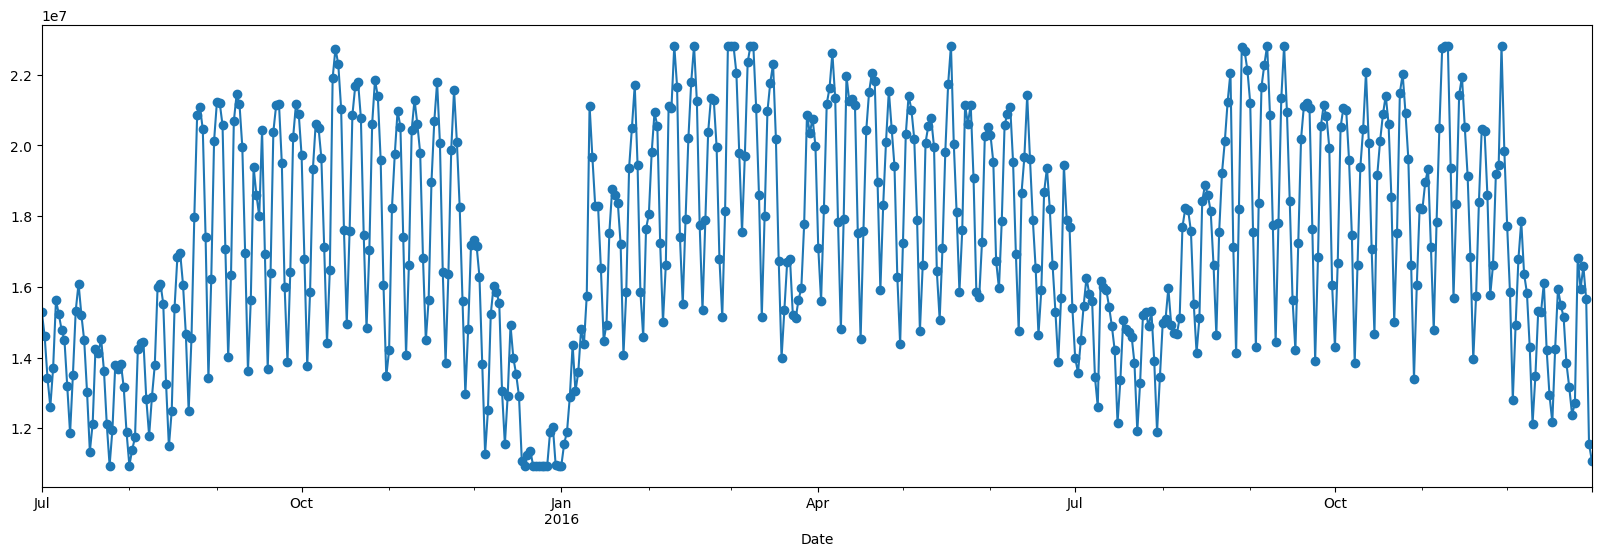

In [ ]:
# linear interpolation
aggregated_data_es.Views = aggregated_data_es.Views.interpolate(method='linear')

# anomalies - clip quantiles
aggregated_data_es.Views = aggregated_data_es.Views.clip(upper=aggregated_data_es.Views.quantile(0.98), lower=aggregated_data_es.Views.quantile(0.02))

# plot
aggregated_data_es.Views.plot(style='-o', figsize=(20,6))

In [ ]:
## train test split
train_max_date = aggregated_data_es.Views.index[-50]
train_es = aggregated_data_es.Views.loc[aggregated_data_es.Views.index < aggregated_data_es.Views.index[-50]].copy()
test_es = aggregated_data_es.Views.loc[aggregated_data_es.Views.index >= aggregated_data_es.Views.index[-50]].copy()

test_es

Date
2016-11-12    15696875.0
2016-11-13    18343205.0
2016-11-14    21435030.0
2016-11-15    21942334.0
2016-11-16    20511588.0
2016-11-17    19143526.0
2016-11-18    16840185.0
2016-11-19    13945644.0
2016-11-20    15752067.0
2016-11-21    18399976.0
2016-11-22    20474033.0
2016-11-23    20403630.0
2016-11-24    18606469.0
2016-11-25    15762362.0
2016-11-26    16626143.0
2016-11-27    19187988.0
2016-11-28    19451796.0
2016-11-29    22828080.2
2016-11-30    19853189.0
2016-12-01    17732257.0
2016-12-02    15843334.0
2016-12-03    12803118.0
2016-12-04    14930947.0
2016-12-05    16797594.0
2016-12-06    17857859.0
2016-12-07    16367965.0
2016-12-08    15831139.0
2016-12-09    14289069.0
2016-12-10    12122513.0
2016-12-11    13477042.0
2016-12-12    15308953.0
2016-12-13    15283991.0
2016-12-14    16106095.0
2016-12-15    14207497.0
2016-12-16    12935726.0
2016-12-17    12170153.0
2016-12-18    14250741.0
2016-12-19    15947831.0
2016-12-20    15486635.0
2016-12-21    15143760.0
2016-12-22    13837820.0
2016-12-23    13155676.0
2016-12-24    12385052.0
2016-12-25    12713363.0
2016-12-26    16819231.0
2016-12-27    15945353.0
2016-12-28    16577375.0
2016-12-29    15647135.0
2016-12-30    11560095.0
2016-12-31    11077924.0
Name: Views, dtype: float64

In [ ]:
train_es = train_es.to_frame(name='Views')
test_es = test_es.to_frame(name='Views')

In [ ]:
print(train_es.shape)
print(test_es.shape)

(500, 1)
(50, 1)


##Smoothing Based Methods

###Moving average forecasting

In [ ]:
df_es = aggregated_data_es.copy()

In [ ]:
pd.DataFrame(index = pd.date_range(start=df_es.index[-1], periods=50,freq='D'))

Empty DataFrame
Columns: []
Index: [2016-12-31 00:00:00, 2017-01-01 00:00:00, 2017-01-02 00:00:00, 2017-01-03 00:00:00, 2017-01-04 00:00:00, 2017-01-05 00:00:00, 2017-01-06 00:00:00, 2017-01-07 00:00:00, 2017-01-08 00:00:00, 2017-01-09 00:00:00, 2017-01-10 00:00:00, 2017-01-11 00:00:00, 2017-01-12 00:00:00, 2017-01-13 00:00:00, 2017-01-14 00:00:00, 2017-01-15 00:00:00, 2017-01-16 00:00:00, 2017-01-17 00:00:00, 2017-01-18 00:00:00, 2017-01-19 00:00:00, 2017-01-20 00:00:00, 2017-01-21 00:00:00, 2017-01-22 00:00:00, 2017-01-23 00:00:00, 2017-01-24 00:00:00, 2017-01-25 00:00:00, 2017-01-26 00:00:00, 2017-01-27 00:00:00, 2017-01-28 00:00:00, 2017-01-29 00:00:00, 2017-01-30 00:00:00, 2017-01-31 00:00:00, 2017-02-01 00:00:00, 2017-02-02 00:00:00, 2017-02-03 00:00:00, 2017-02-04 00:00:00, 2017-02-05 00:00:00, 2017-02-06 00:00:00, 2017-02-07 00:00:00, 2017-02-08 00:00:00, 2017-02-09 00:00:00, 2017-02-10 00:00:00, 2017-02-11 00:00:00, 2017-02-12 00:00:00, 2017-02-13 00:00:00, 2017-02-14 00:00:00, 2017-02-15 00:00:00, 2017-02-16 00:00:00, 2017-02-17 00:00:00, 2017-02-18 00:00:00]

In [ ]:
df_es = pd.concat([df_es, pd.DataFrame(index=pd.date_range(start=df_es.index[-1], periods=50, freq='D')[1:])], ignore_index=False)

df_es.tail(20)

Views
2017-01-30    NaN
2017-01-31    NaN
2017-02-01    NaN
2017-02-02    NaN
2017-02-03    NaN
2017-02-04    NaN
2017-02-05    NaN
2017-02-06    NaN
2017-02-07    NaN
2017-02-08    NaN
2017-02-09    NaN
2017-02-10    NaN
2017-02-11    NaN
2017-02-12    NaN
2017-02-13    NaN
2017-02-14    NaN
2017-02-15    NaN
2017-02-16    NaN
2017-02-17    NaN
2017-02-18    NaN

In [ ]:
pred = df_es.Views.dropna().values

n_predictions = len(df_es) - len(pred)

for i in range(n_predictions):
  pred = np.append(pred, pred[-3:].mean())

pred[-20:]

array([12000182.91812191, 12000182.78712471, 12000182.83587623,
       12000182.84704095, 12000182.8233473 , 12000182.8354215 ,
       12000182.83526991, 12000182.83134624, 12000182.83401255,
       12000182.8335429 , 12000182.83296723, 12000182.83350756,
       12000182.83333923, 12000182.83327134, 12000182.83337271,
       12000182.83332776, 12000182.83332394, 12000182.83334147,
       12000182.83333106, 12000182.83333216])

<Axes: >

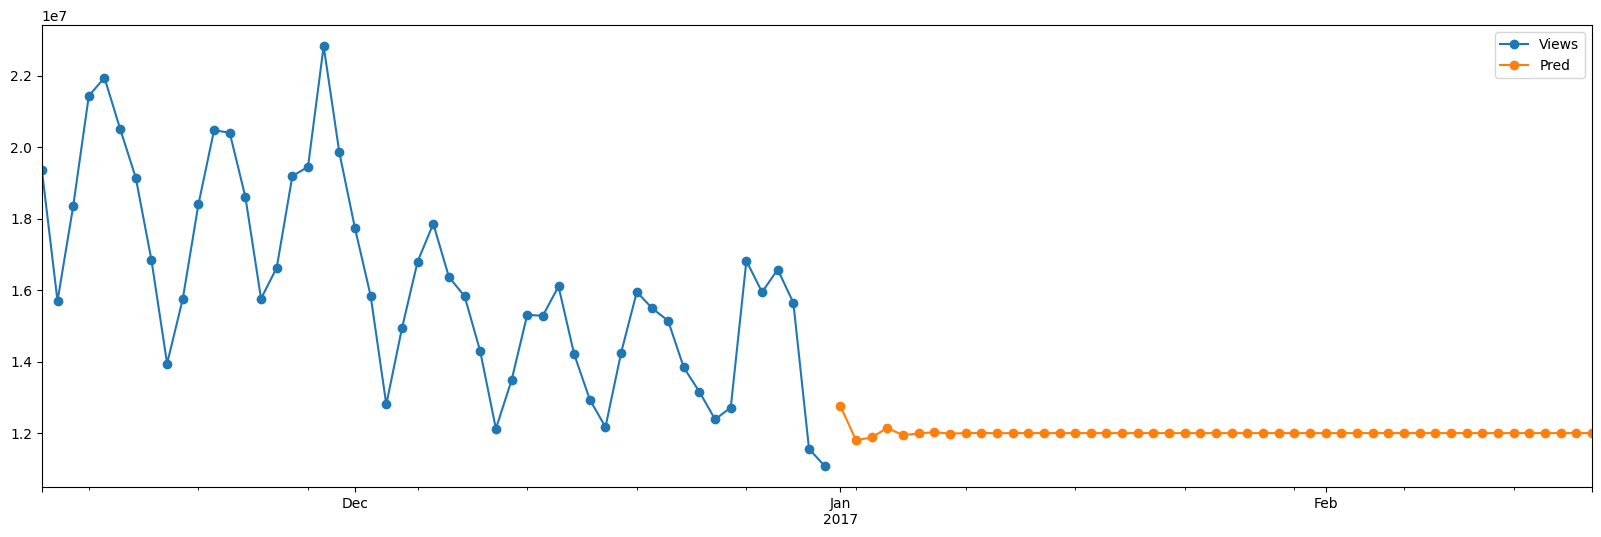

In [ ]:
df_es['Pred'] = pred

df_es.loc[~df_es['Views'].isna(), 'Pred'] = np.nan
df_es.tail(100).plot(style='-o',figsize=(20,6))

MAE : 5036072.181
RMSE : 5666557.082
MAPE: 0.349


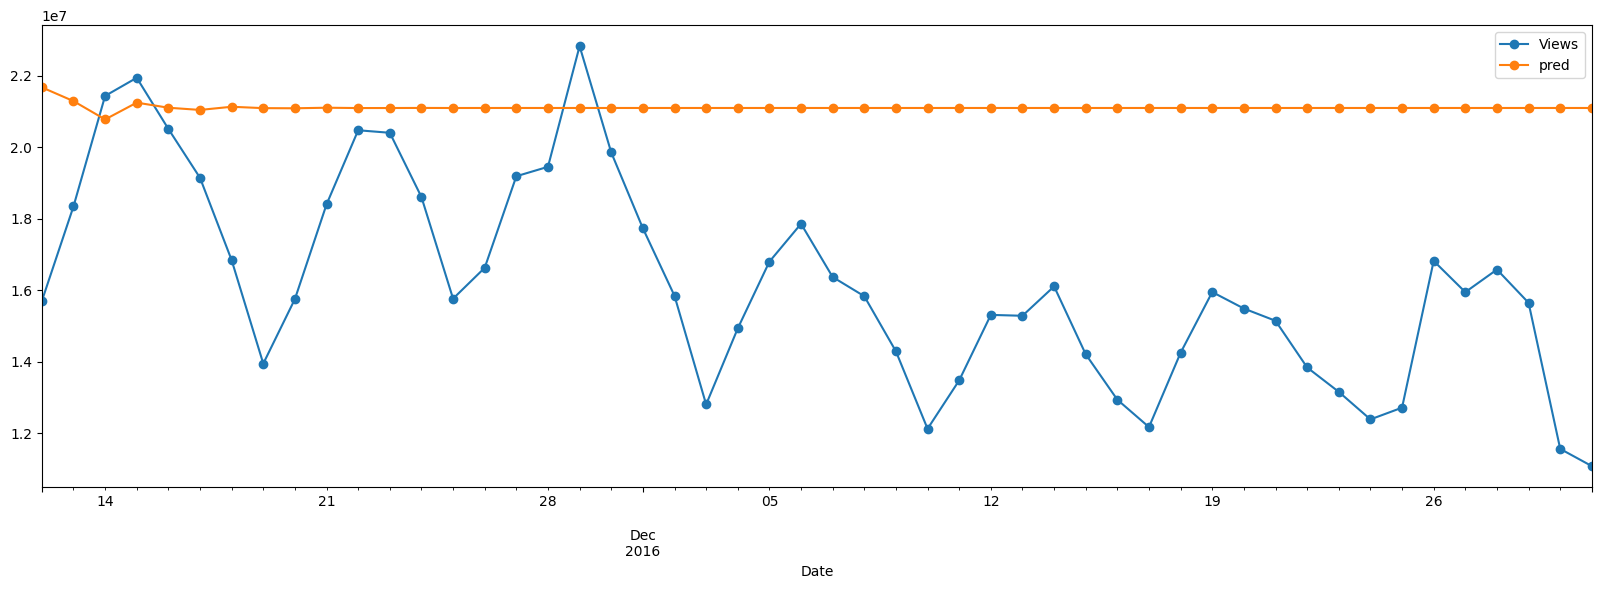

In [ ]:
df_es = train_es.copy()

df_es = pd.concat([df_es, pd.DataFrame(index=pd.date_range(start=df_es.index[-1], periods=50, freq='D')[1:])], ignore_index=False)

pred = df_es.Views.dropna().values

for i in range(50):
  pred = np.append(pred, pred[-3:].mean())

test_es['pred'] = pred[-50:]
test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

###Simple exponential smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


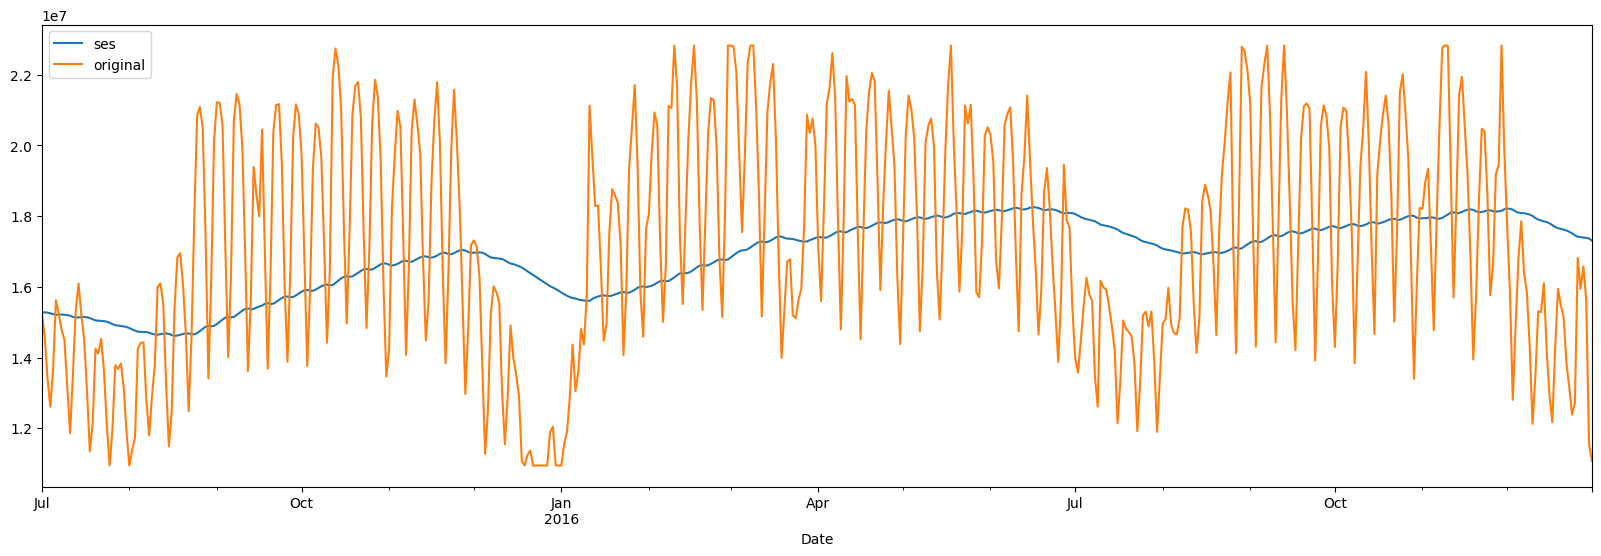

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = pd.Series(SimpleExpSmoothing(aggregated_data_es.Views).fit(smoothing_level=1/(2*50)).fittedvalues)

model.plot(label='ses', figsize=(20,6))
aggregated_data_es.Views.plot(label='original')
plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


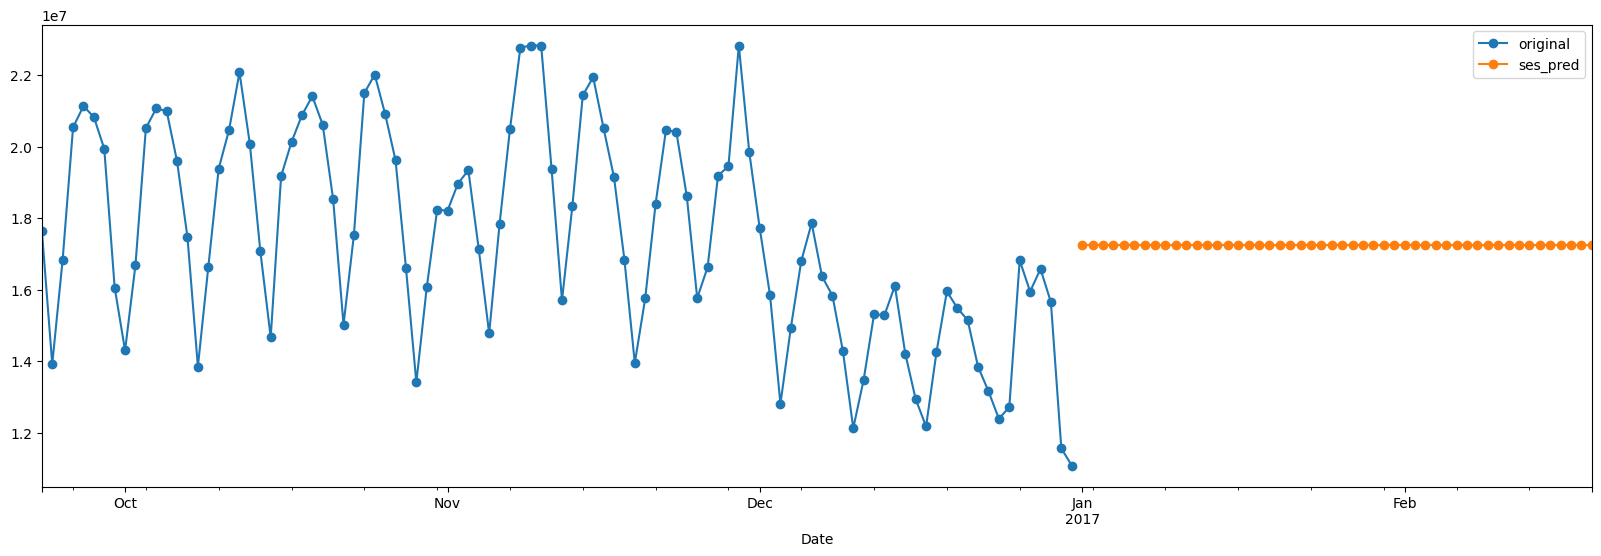

In [ ]:
model = sm.tsa.SimpleExpSmoothing(aggregated_data_es.Views).fit(smoothing_level=1/(2*50))
pred = model.forecast(steps = 50)

aggregated_data_es.Views.tail(100).plot(label='original', style='-o')

pred.plot(label='ses_pred', style='-o',figsize=(20,6))
plt.legend()

#### performance of the Simple Exponential model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


MAE : 2919127.883
RMSE : 3404628.384
MAPE: 0.2


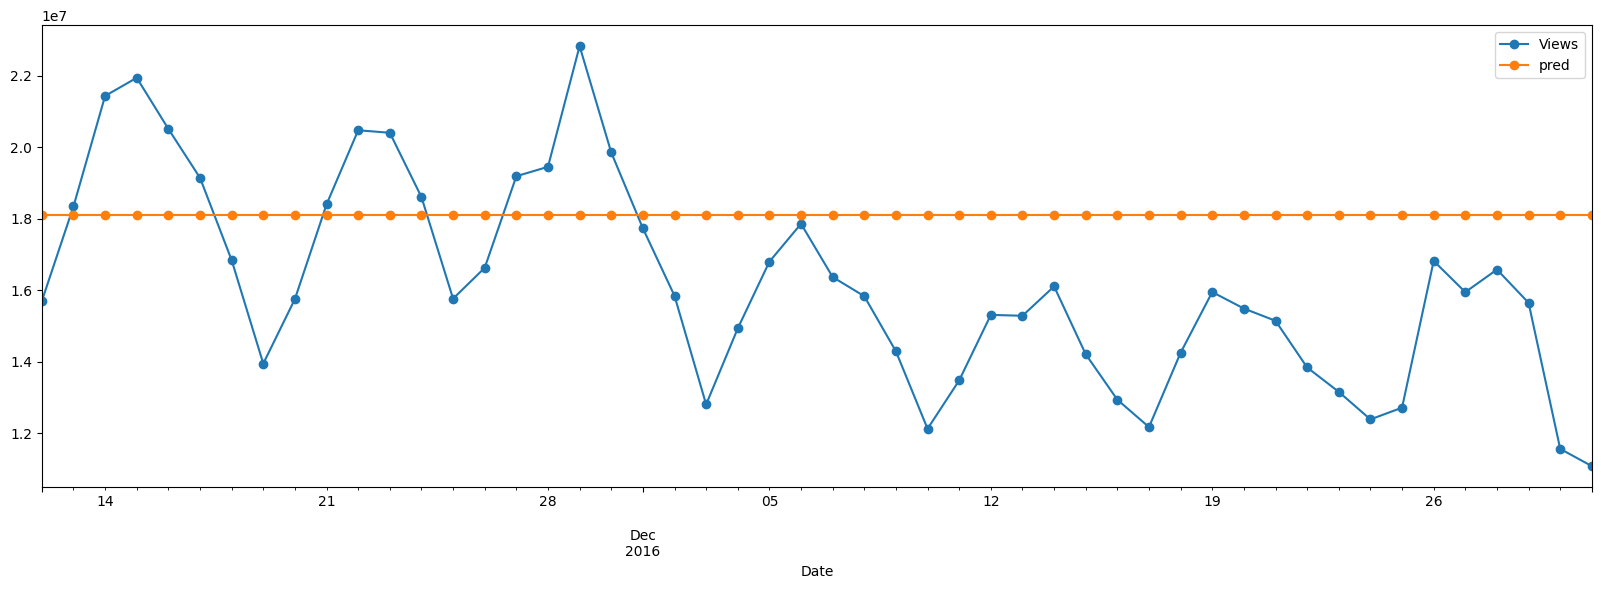

In [ ]:
model = sm.tsa.SimpleExpSmoothing(train_es.Views).fit(smoothing_level=1/(2*50))
test_es['pred'] = model.forecast(steps = 50)
test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

###Double Exponential smoothing (Holt's method)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


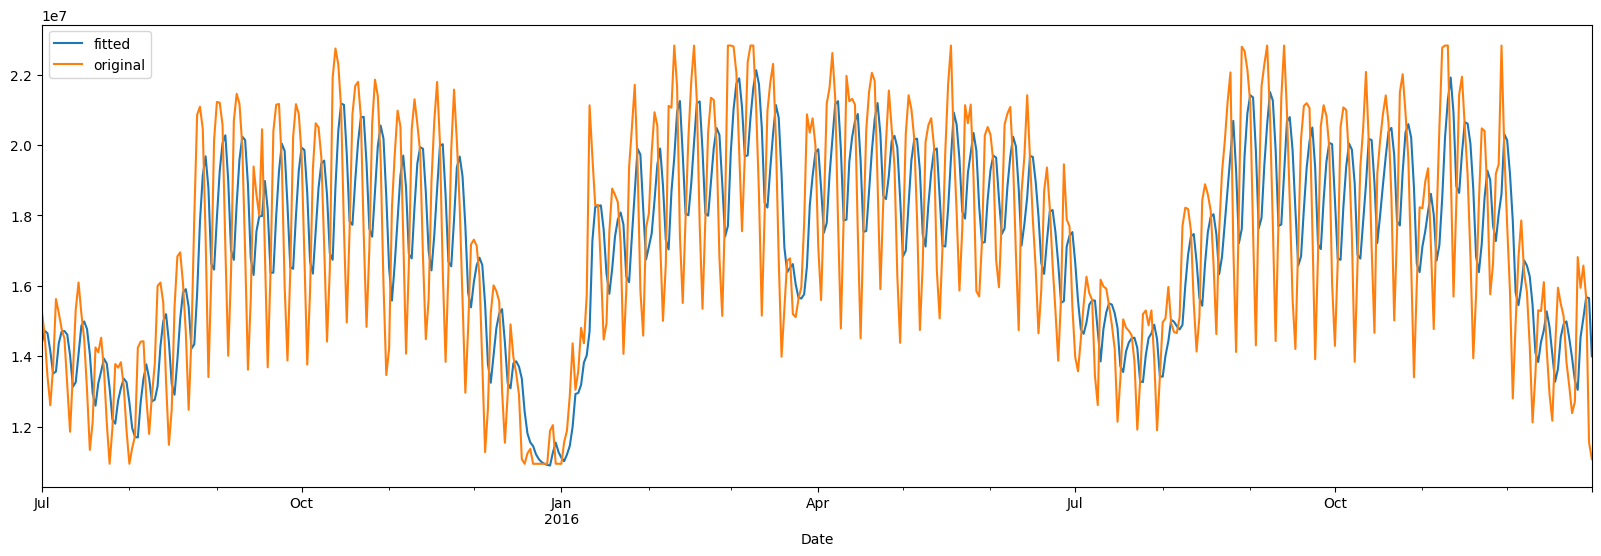

In [ ]:
model = sm.tsa.ExponentialSmoothing(aggregated_data_es.Views, trend='add').fit(smoothing_level=0.4)
model.fittedvalues.plot(label='fitted', figsize=(20,6))
aggregated_data_es.Views.plot(label='original')
plt.legend()

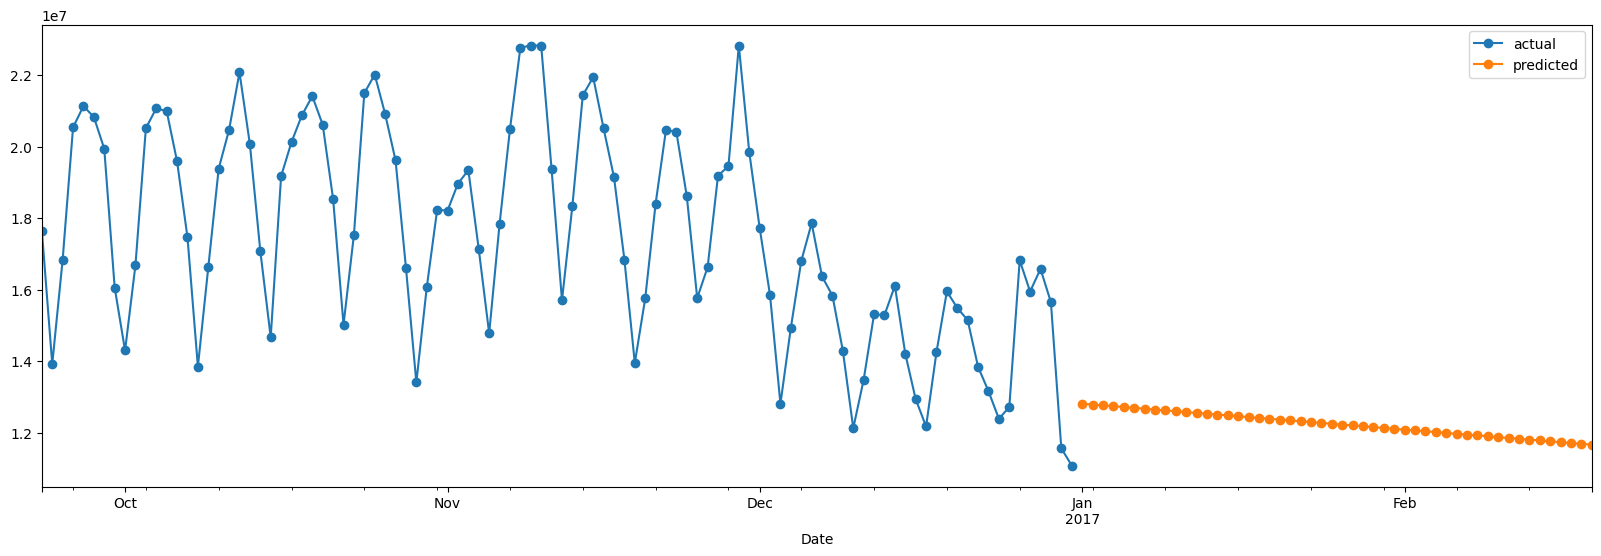

In [ ]:
pred = model.forecast(steps = 50)
aggregated_data_es.Views.tail(100).plot(style='-o', label='actual', figsize=(20,6))
pred.plot(style='-o', label='predicted')
plt.legend()

####performance of the Double Exponential model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAE : 3242945.98
RMSE : 3783889.088
MAPE: 0.225


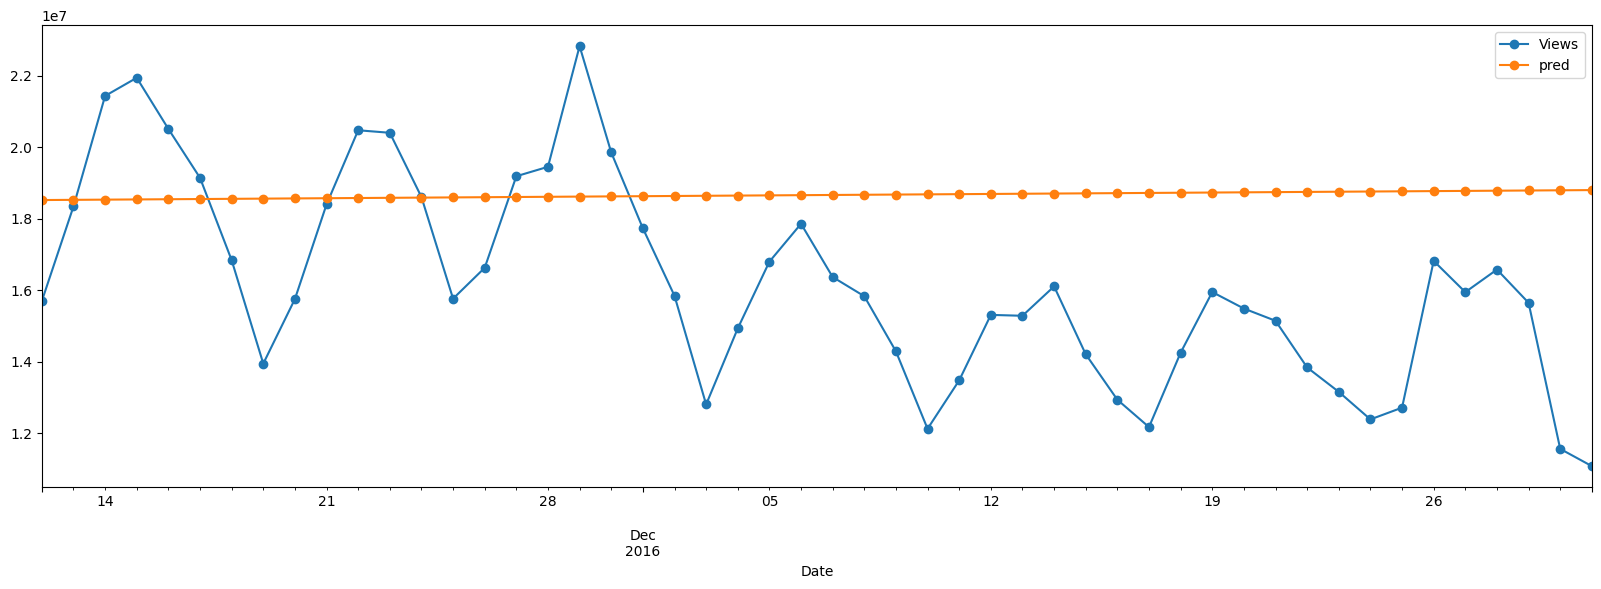

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_es.Views, trend='add').fit(smoothing_level=1/(2*50))
test_es['pred'] = model.forecast(steps = 50)
test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

###Triple Exponential smoothing (aka Holt-Winters Method)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='Date'>

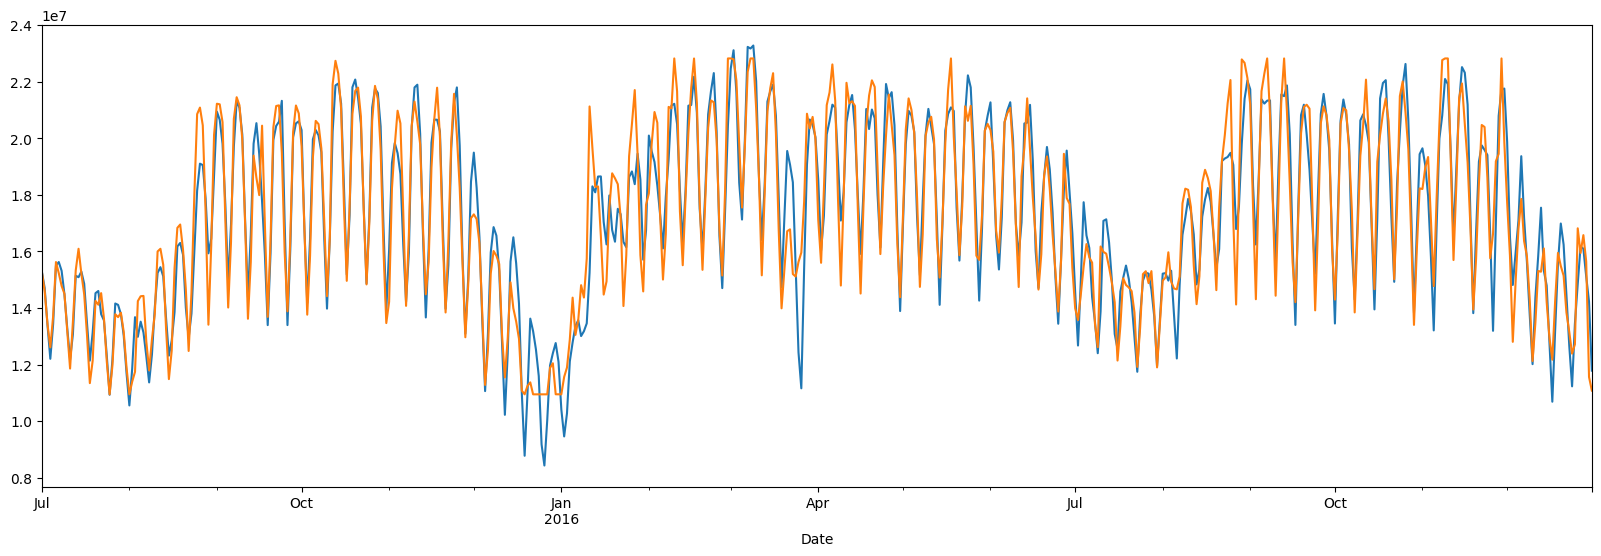

In [ ]:
model = sm.tsa.ExponentialSmoothing(aggregated_data_es.Views, trend='add', seasonal='add').fit(smoothing_level=0.4)
model.fittedvalues.plot(figsize=(20,6) )
aggregated_data_es.Views.plot()

<Axes: xlabel='Date'>

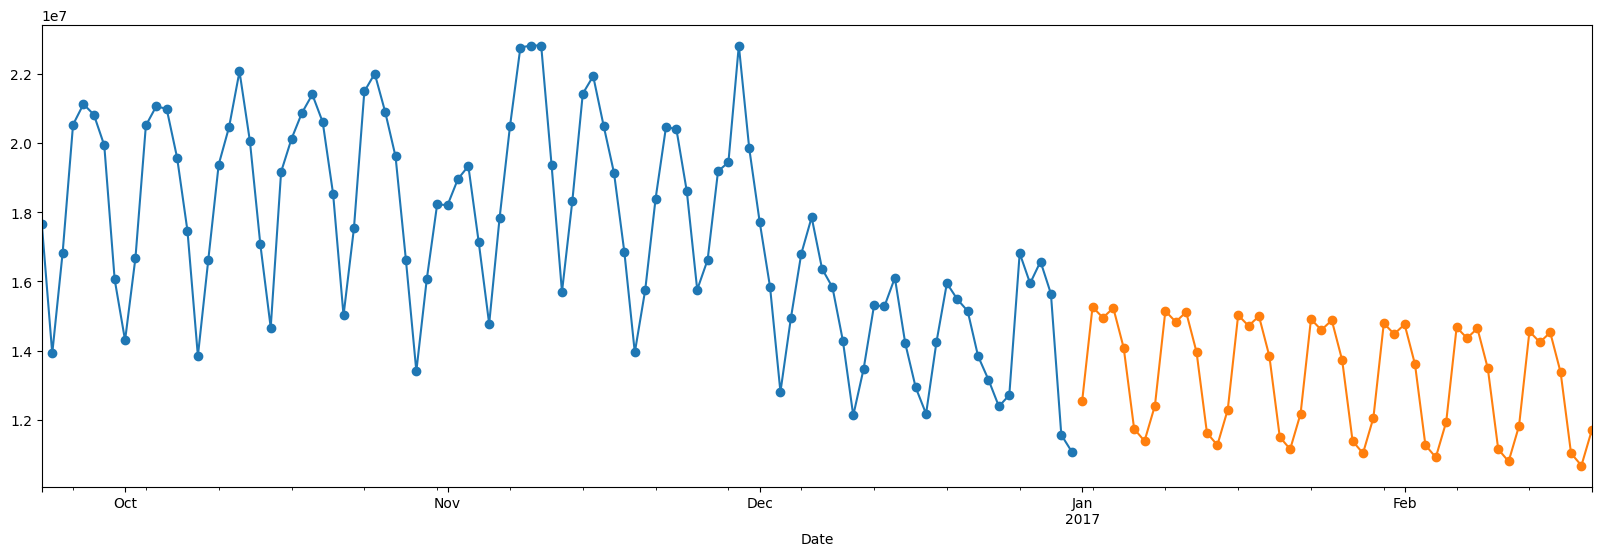

In [ ]:
pred = model.forecast(steps = 50)
aggregated_data_es.Views.tail(100).plot(style='-o',figsize=(20,6))
pred.plot(style='-o')

###performance of the Triple Exponential model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAE : 3327686.248
RMSE : 3935436.951
MAPE: 0.219


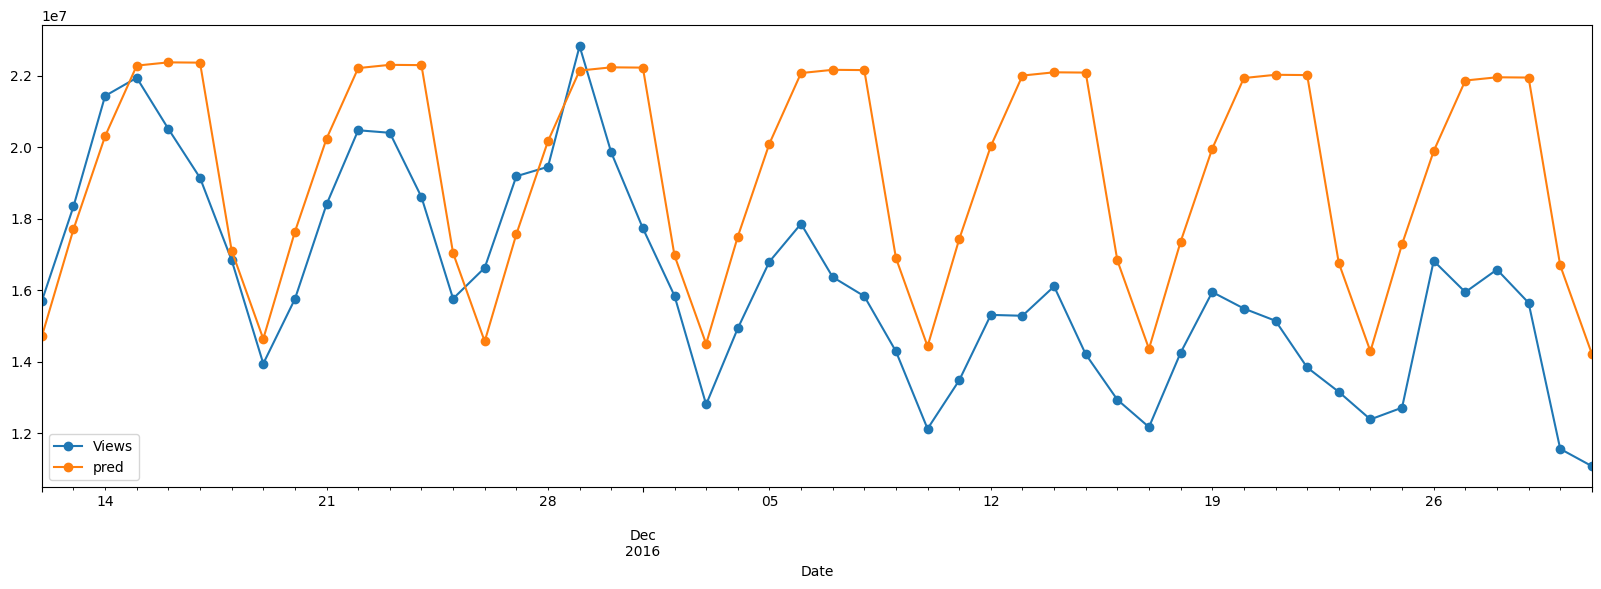

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_es.Views, trend='add', seasonal='add').fit(smoothing_level=1/(2*50))
test_es['pred'] = model.forecast(steps=50)
test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAE : 3068478.074
RMSE : 3631551.255
MAPE: 0.201


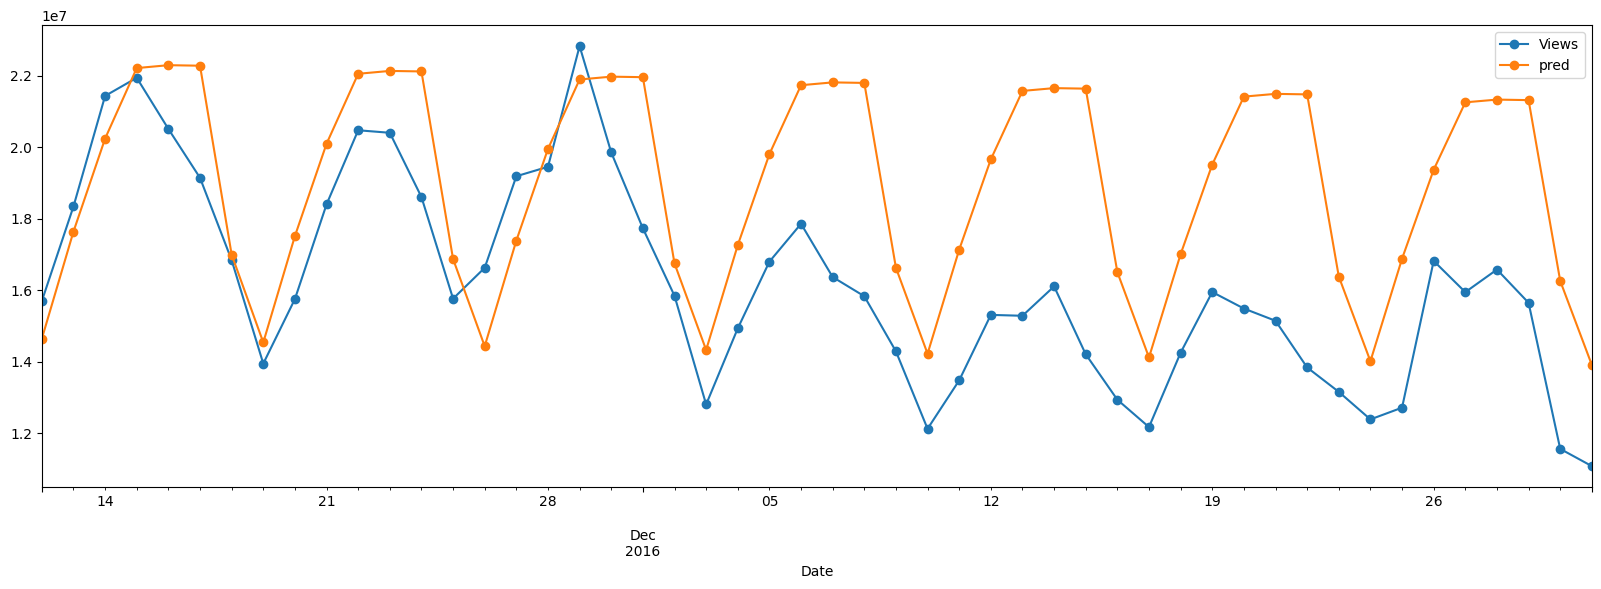

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_es.Views, trend='add', seasonal='mul').fit(smoothing_level=1/(2*50))
test_es['pred'] = model.forecast(steps=50)
test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

In [ ]:
test_es.head()

Views          pred
Date                                
2016-11-12  15696875.0  1.464261e+07
2016-11-13  18343205.0  1.764039e+07
2016-11-14  21435030.0  2.024178e+07
2016-11-15  21942334.0  2.221378e+07
2016-11-16  20511588.0  2.229485e+07

In [ ]:
test_es.drop('pred', axis=1, inplace=True)

###ARIMA

In [ ]:
##Auto Regression (AR)

In [ ]:
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')

In [ ]:
adf_test(train_es.Views)

Sequence is stationary


In [ ]:
model = SARIMAX(train_es.Views, order=(1, 0, 0))
model = model.fit(disp=False)
test_es['pred'] = model.forecast(steps=50)
test_es['pred'].head(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Date
2016-11-12    1.923359e+07
2016-11-13    1.910111e+07
2016-11-14    1.896955e+07
2016-11-15    1.883889e+07
2016-11-16    1.870913e+07
2016-11-17    1.858027e+07
2016-11-18    1.845229e+07
2016-11-19    1.832520e+07
2016-11-20    1.819898e+07
2016-11-21    1.807363e+07
2016-11-22    1.794914e+07
2016-11-23    1.782551e+07
2016-11-24    1.770274e+07
2016-11-25    1.758080e+07
2016-11-26    1.745971e+07
2016-11-27    1.733945e+07
2016-11-28    1.722002e+07
2016-11-29    1.710142e+07
2016-11-30    1.698363e+07
2016-12-01    1.686665e+07
Name: pred, dtype: float64

In [ ]:
# Integrate !!

test_es['pred'] = test_es['pred'].cumsum() + train_es.Views[-1]

MAE : 442730982.601
RMSE : 501843731.982
MAPE: 29.879


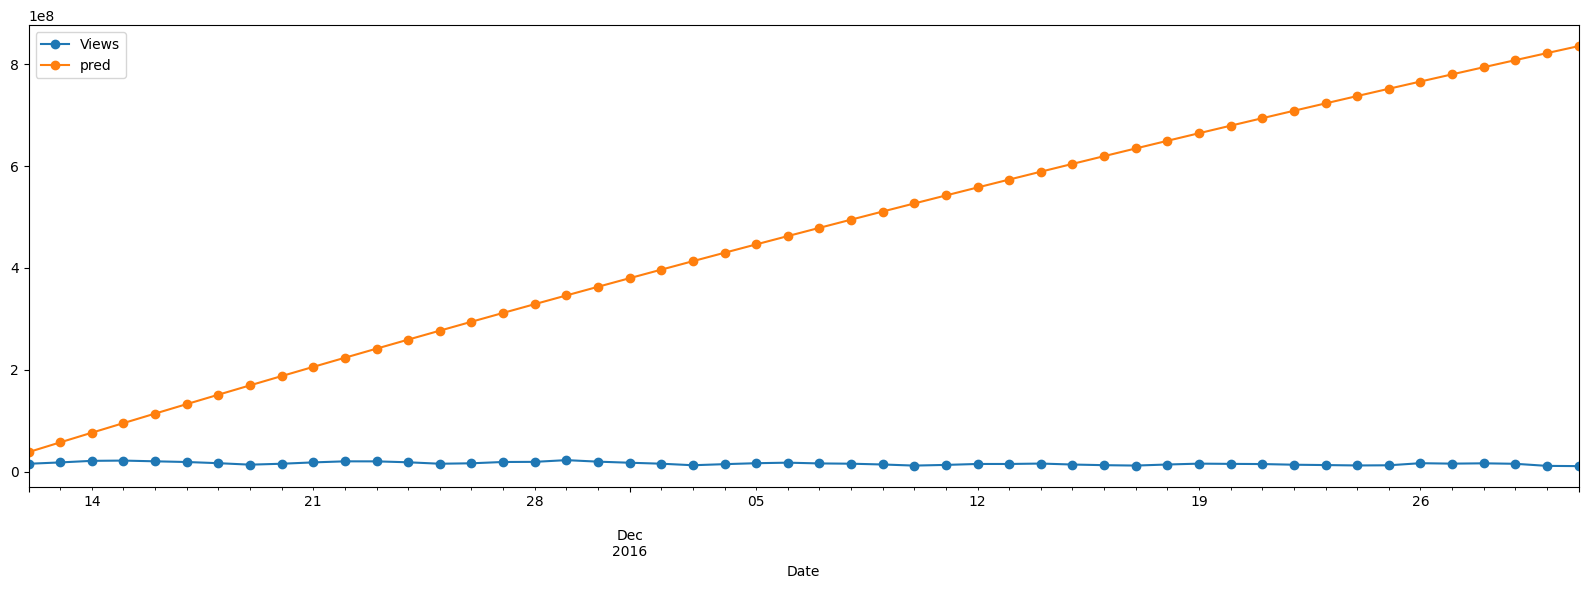

In [ ]:
test_es.plot(style='-o',figsize=(20,6) )
performance(test_es['Views'], test_es['pred'])

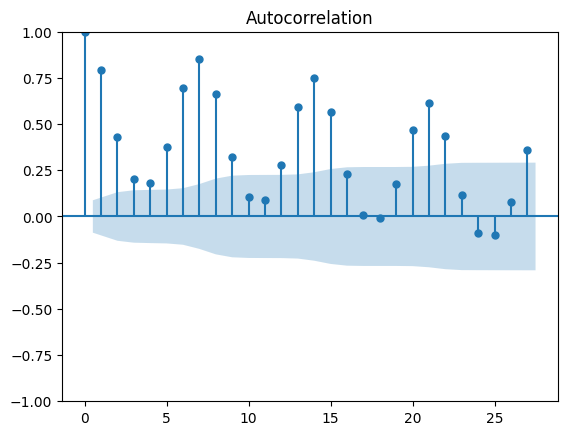

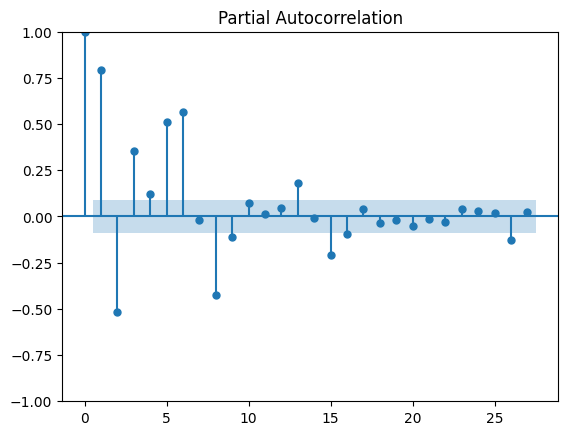

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(train_es.Views);
plot_pacf(train_es.Views);

In [ ]:
test_es.head()

Views          pred
Date                                
2016-11-12  15696875.0  3.860057e+07
2016-11-13  18343205.0  5.770169e+07
2016-11-14  21435030.0  7.667124e+07
2016-11-15  21942334.0  9.551013e+07
2016-11-16  20511588.0  1.142193e+08

In [ ]:
test_es.isna().sum()

Views    0
pred     0
dtype: int64

In [ ]:
test_es.drop('pred', axis=1, inplace=True)

In [ ]:
test_es.head()

Views
Date                  
2016-11-12  15696875.0
2016-11-13  18343205.0
2016-11-14  21435030.0
2016-11-15  21942334.0
2016-11-16  20511588.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 457717936.657
RMSE : 522050754.563
MAPE: 30.94


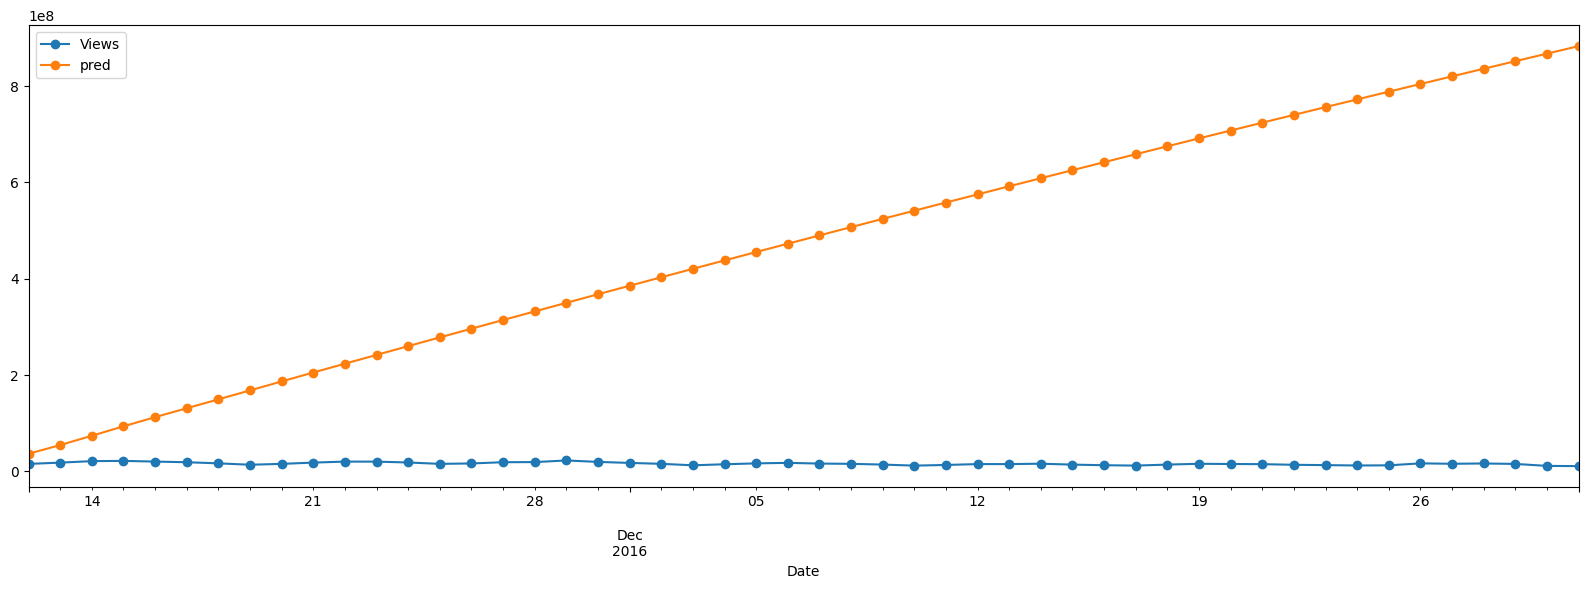

In [ ]:
model = SARIMAX(train_es.Views, order=(3, 0, 0))
model = model.fit(disp=False)
test_es['pred'] = model.forecast(steps=50)

# Integrating the trend back!
test_es['pred'] = test_es['pred'].cumsum() + train_es.Views[-1]

# Plotting
test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 10235275.88
RMSE : 10615778.484
MAPE: 0.682


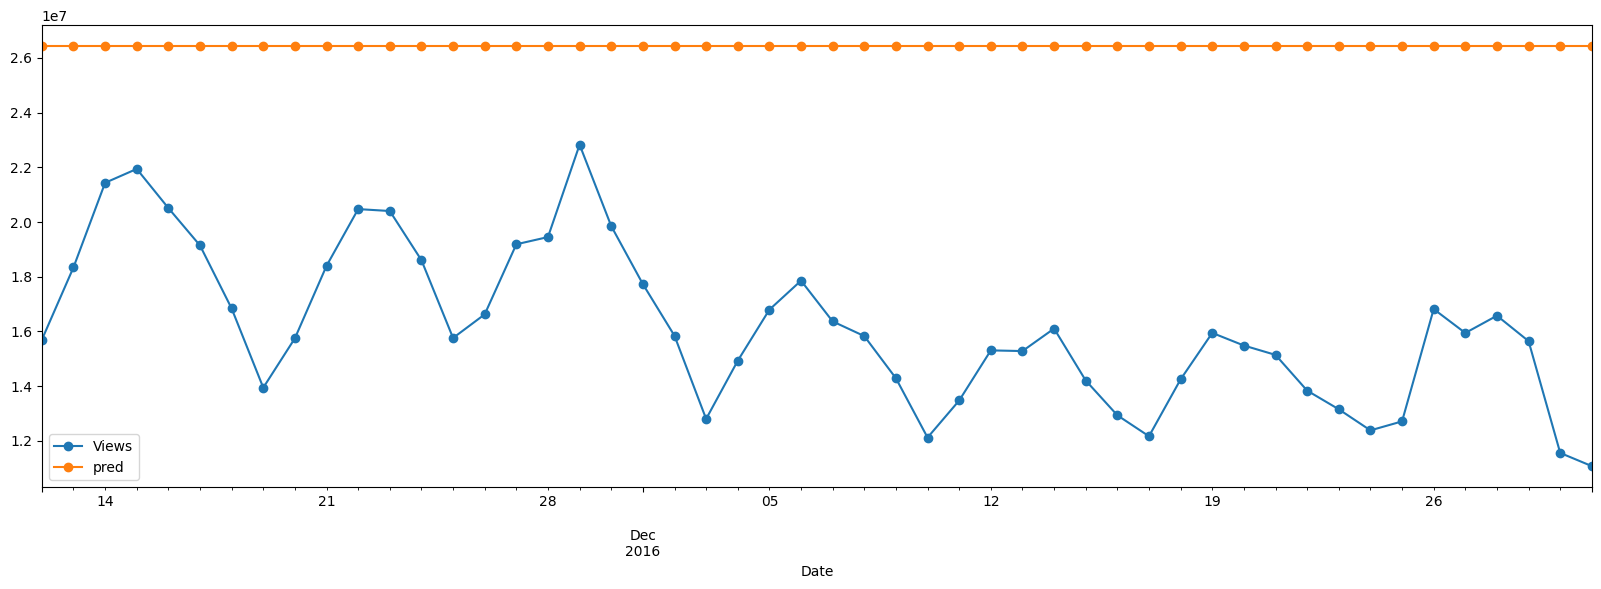

In [ ]:
##Moving Averages (MA)
model = SARIMAX(train_es.Views, order=(0, 0, 1))
model = model.fit(disp=False)
test_es['pred'] = model.forecast(steps=50)

test_es['pred'] = test_es['pred'].cumsum() + train_es.Views[-1]

test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 18696654.052
RMSE : 18914512.161
MAPE: 1.22


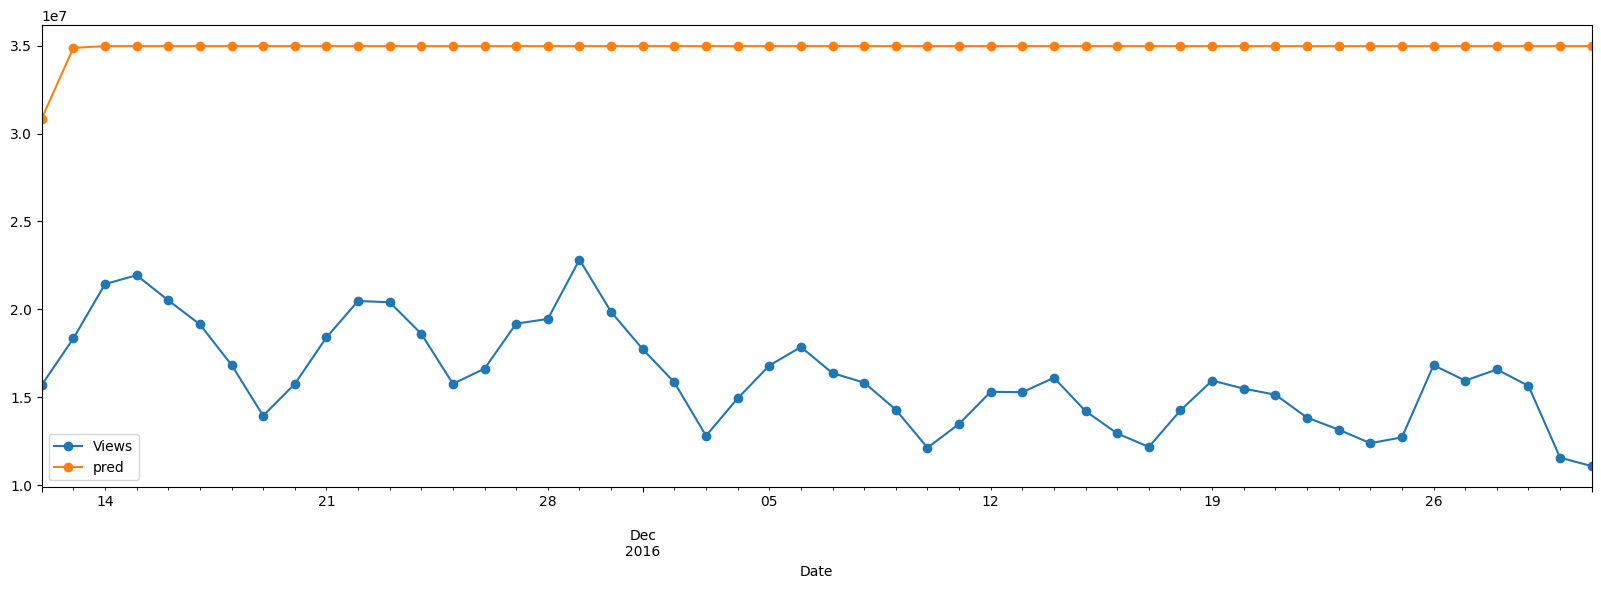

In [ ]:
model = SARIMAX(train_es.Views, order=(0, 0, 3))
model = model.fit(disp=False)
test_es['pred'] = model.forecast(steps=50)

test_es['pred'] = test_es['pred'].cumsum() + train_es.Views[-1]

test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

In [ ]:
test_es.drop('pred', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 533789537.878
RMSE : 613805505.918
MAPE: 36.153


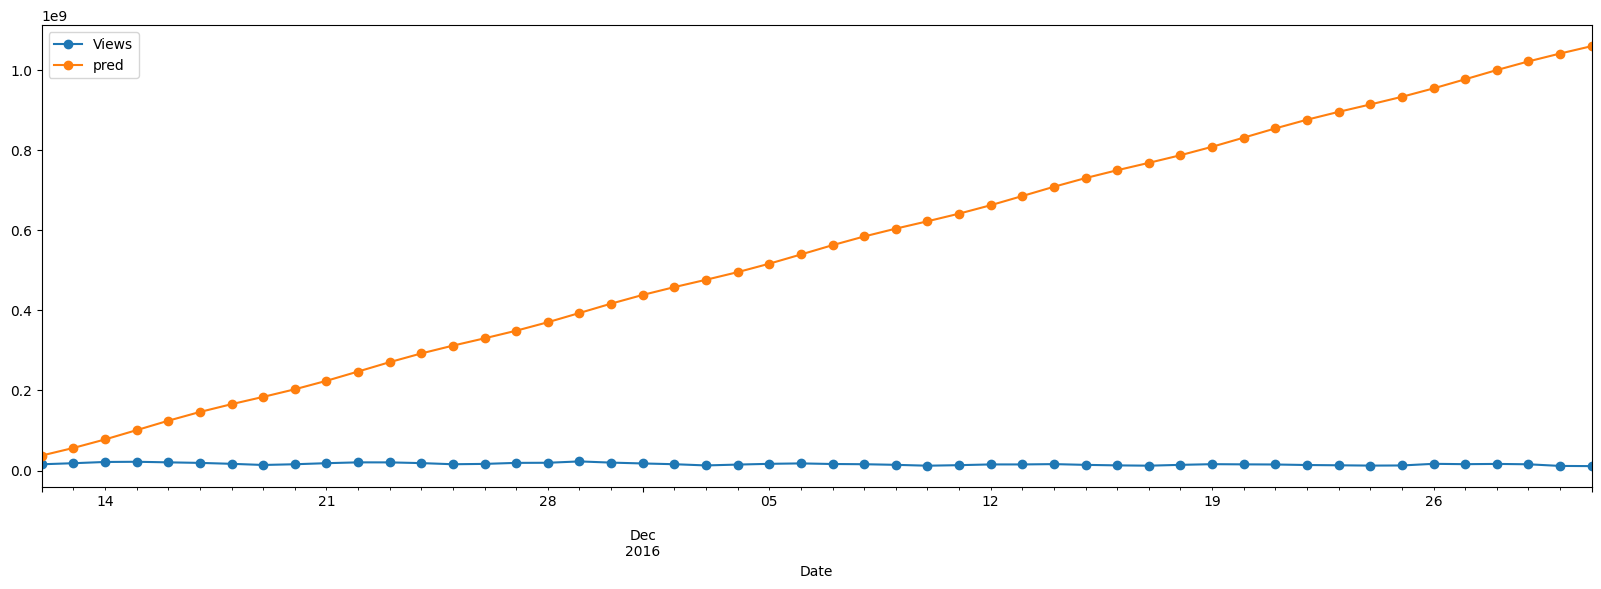

In [ ]:
##Auto Regression - Moving Averages (ARMA)

model = SARIMAX(train_es.Views, order=(3, 0, 3))
model = model.fit(disp=False)
test_es['pred'] = model.forecast(steps=50)

test_es['pred'] = test_es['pred'].cumsum() + train_es.Views[-1]

test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 422579712.512
RMSE : 482922203.252
MAPE: 28.581


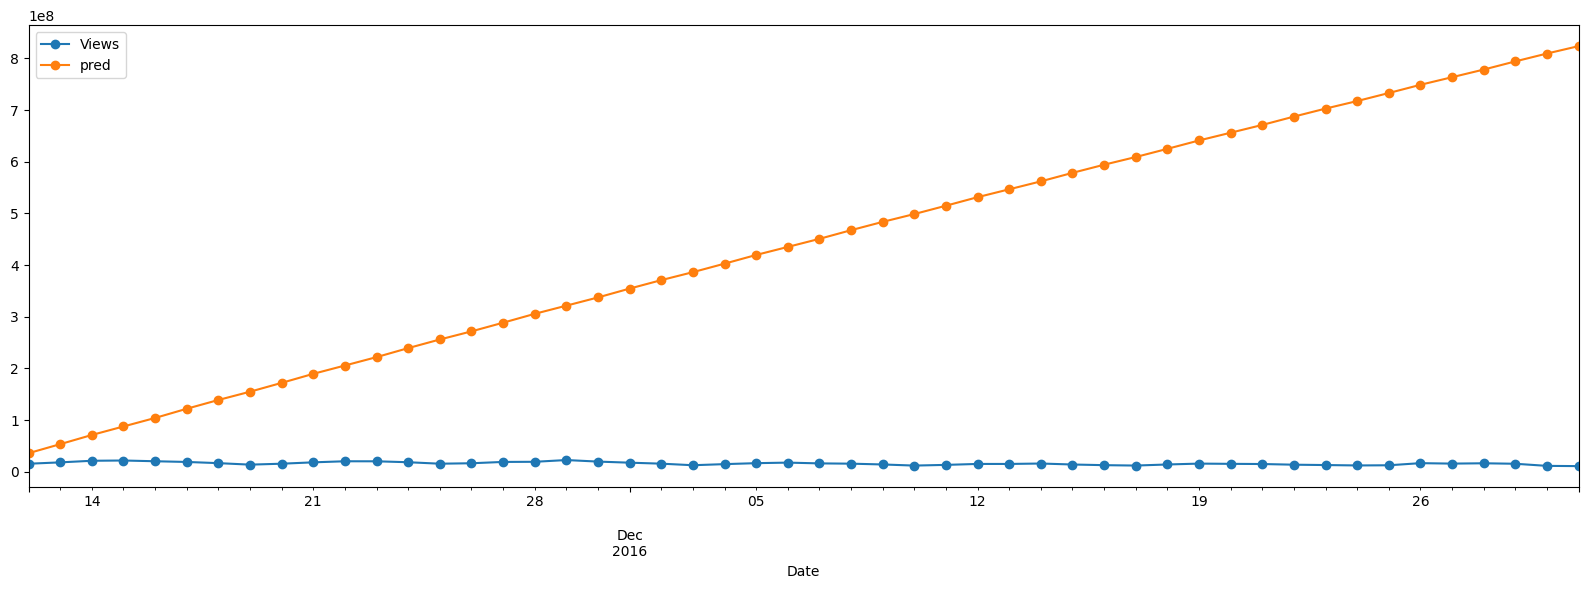

In [ ]:
model = SARIMAX(train_es.Views, order=(5, 0, 5))
model = model.fit(disp=False)
test_es['pred'] = model.forecast(steps=50)

test_es['pred'] = test_es['pred'].cumsum() + train_es.Views[-1]

test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

In [ ]:
test_es.drop('pred', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 4587448.809
RMSE : 5120418.554
MAPE: 0.314


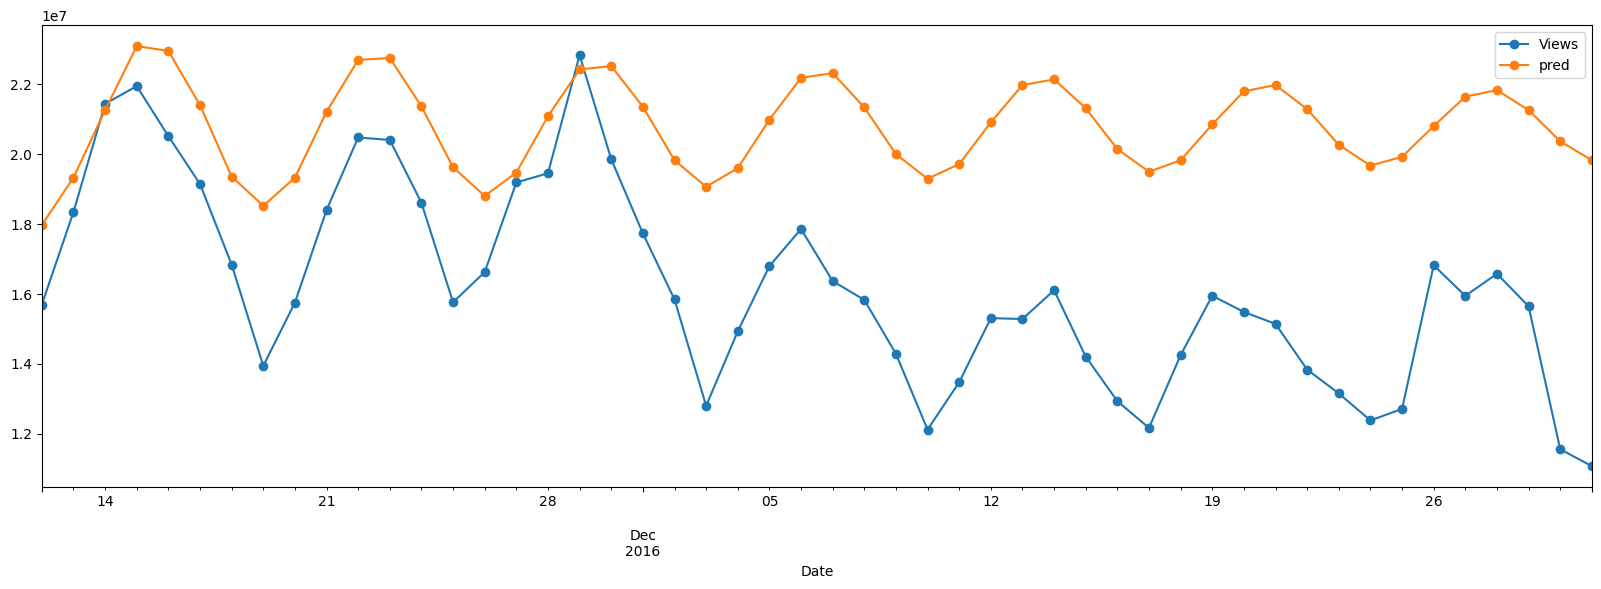

In [ ]:
##ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_es.Views, order=(3, 1, 3))
model = model.fit(disp=False)
test_es['pred'] = model.forecast(steps=50)
test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 4016092.014
RMSE : 4715936.152
MAPE: 0.281


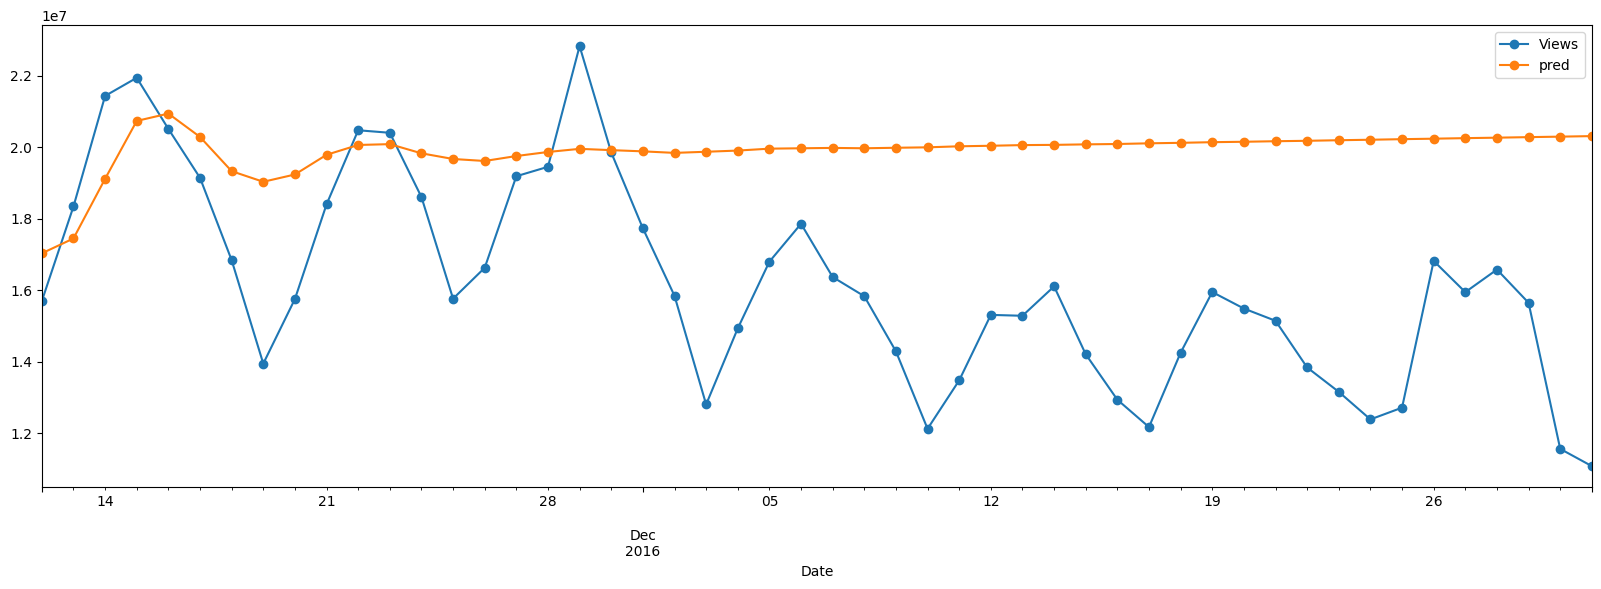

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_es.Views, order=(3, 2, 3))
model = model.fit(disp=False)
test_es['pred'] = model.forecast(steps=50)
test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 4739163.009
RMSE : 5357675.374
MAPE: 0.322


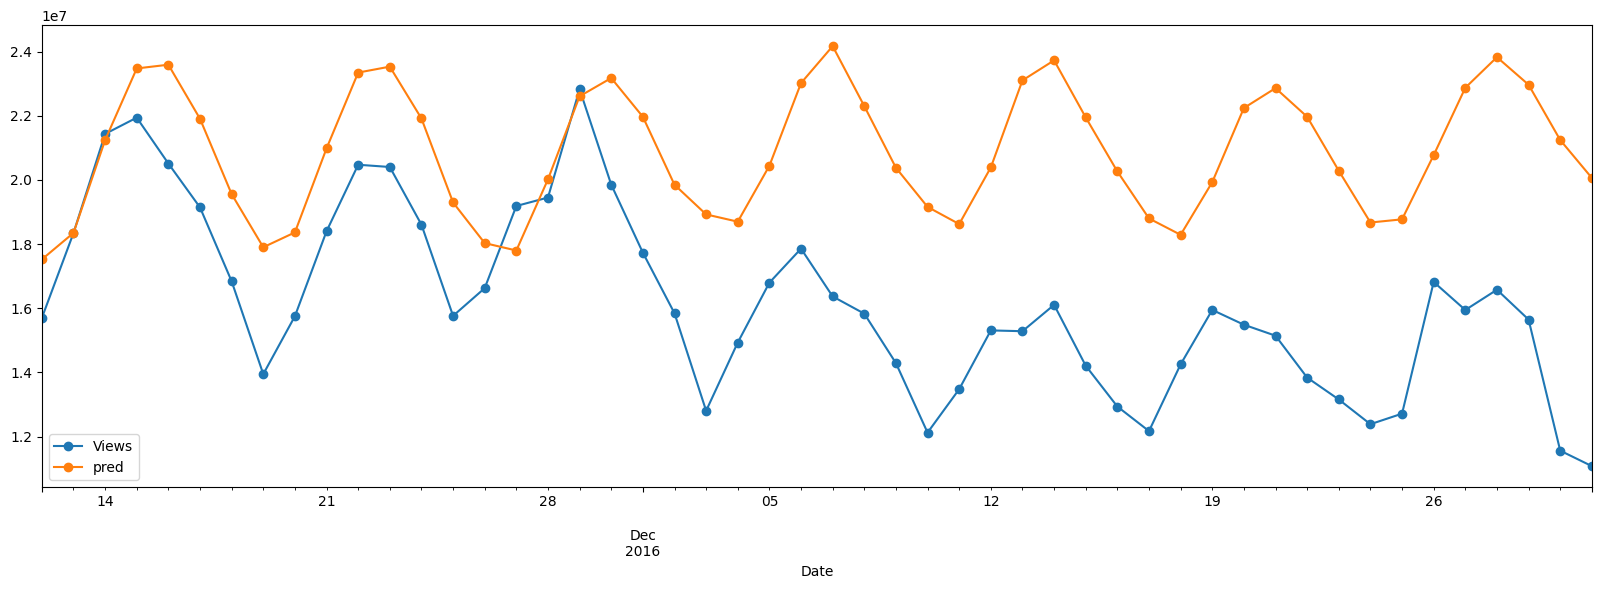

In [ ]:
##SARIMA

model = SARIMAX(train_es.Views, order=(3, 1, 3), seasonal_order=(1,1,1,50))
model = model.fit(disp=False)
test_es['pred'] = model.forecast(steps=50)
test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 2161529.751
RMSE : 2697571.066
MAPE: 0.136


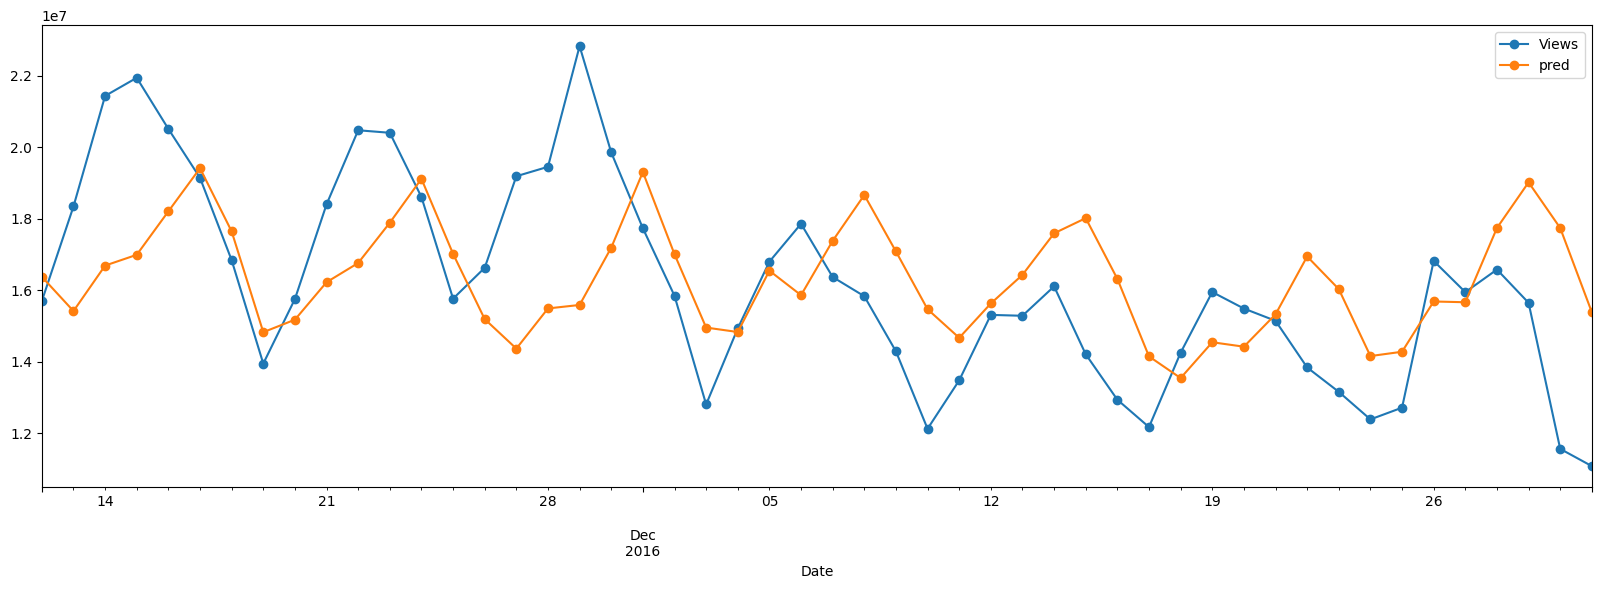

In [ ]:
model = SARIMAX(train_es.Views, order=(3, 2, 3), seasonal_order=(1,1,1,50))
model = model.fit(disp=False)
test_es['pred'] = model.forecast(steps=50)
test_es.plot(style='-o',figsize=(20,6))
performance(test_es['Views'], test_es['pred'])

**Observations**

**Problem Statement:**

The main goal is to forecast the daily view counts on various Wikipedia pages to optimize ad placements for Ad Ease’s clients.

**Usage Scenarios:**

**Advertising Optimization:** Businesses can use this forecasted data to time and place their ads for maximum engagement.

**Content and Media Planning:** Content providers can target high-traffic pages to drive awareness or releases during peak times.

**Decomposition of Series **

**Trend:** The long-term direction of the data, showing an overall increase or decrease over time.

**Seasonality:** The repeated patterns or cycles in the data at regular intervals, such as daily, weekly, or monthly.

**Differencing**

Differencing was applied once (i.e., first-order differencing) in most cases to achieve stationarity. However, some series with strong seasonality might require seasonal differencing or second-order differencing depending on the outcome of the **Augmented Dickey-Fuller (ADF)** test.

**ARIMA (AutoRegressive Integrated Moving Average):** Models a time series based solely on its own past values (autoregression) and past forecast errors (moving average). It assumes the data is stationary.

**SARIMA (Seasonal ARIMA):** Extends ARIMA by adding seasonal components to handle seasonality in the data. It includes additional parameters for seasonal autoregression, seasonal differencing, and seasonal moving average.

**SARIMAX (Seasonal ARIMA with Exogenous Regressors):** Further extends SARIMA by incorporating external variables (exogenous variables) that might affect the time series, such as campaign data, which can improve model accuracy.